# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

### **Import Libraries and Settings**

In [3]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [4]:
df = pd.read_csv('marketing_campaign_data.csv')

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

## Data Understanding & Initial Transformation

In [5]:
df.sample(10)

Unnamed: 0     ID  Year_Birth Education Marital_Status       Income  \
1228        1228   8210        1975        S2        Menikah   54730000.0   
2233        2233   9432        1977        S1    Bertunangan  666666000.0   
1400        1400   4094        1961        S1        Menikah   60544000.0   
654          654   3277        1955        S1          Cerai   49431000.0   
582          582   5081        1967        D3    Bertunangan   47821000.0   
87            87   4452        1957        S1         Lajang   50388000.0   
1725        1725   2634        1979        S2         Lajang   16653000.0   
933          933   5692        1989       SMA        Menikah   25443000.0   
570          570   6818        1974        S1        Menikah   44989000.0   
1901        1901  10779        1983        S1         Lajang   22148000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
1228        0         1  15-08-2013       64   318000       3000   
2233        1         0  02-06-2013       23     9000      14000   
1400        1         1  25-08-2012       92   201000       2000   
654         0         1  03-08-2012        9   219000       3000   
582         1         1  20-10-2013       54     9000          0   
87          0         1  28-05-2014        3   292000       6000   
1725        1         0  18-04-2014       10     5000       7000   
933         1         0  22-12-2012       82     1000       4000   
570         0         1  12-09-2012       26    98000          0   
1901        0         0  13-04-2014       16    15000       5000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1228            17000             4000              7000         56000   
2233            18000             8000              1000         12000   
1400            43000             3000              5000         35000   
654            100000            26000                 0         17000   
582             16000             6000              6000         10000   
87              37000                0              3000         34000   
1725            31000            15000              4000          7000   
933              3000             8000              9000          7000   
570            106000            49000             10000        106000   
1901            14000                0              4000         11000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1228                  5                4                    1   
2233                  4                3                    1   
1400                  4                5                    1   
654                   2                7                    1   
582                   1                1                    0   
87                    4                6                    1   
1725                  3                2                    1   
933                   1                1                    0   
570                   5                5                    1   
1901                  1                1                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1228                  8                  4             0             0   
2233                  3                  6             0             0   
1400                  5                  6             0             0   
654                   5                  8             0             0   
582                   3                  8             0             0   
87                    6                  7             0             1   
1725                  3                  6             0             0   
933                   3                  8             0             0   
570                   5                  6             0             0   
1901                  3                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_Cos

In [6]:
# Initial transformation
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sort_index(inplace=True)

### **Data Information**

In [7]:
df.shape

(2240, 29)

- The dataset have 2240 rows and 29 columns

In [8]:
# Check data information
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage  \
0                    ID      int64             0              0.00   
1            Year_Birth      int64             0              0.00   
2             Education     object             0              0.00   
3        Marital_Status     object             0              0.00   
4                Income    float64            24              1.07   
5               Kidhome      int64             0              0.00   
6              Teenhome      int64             0              0.00   
7           Dt_Customer     object             0              0.00   
8               Recency      int64             0              0.00   
9               MntCoke      int64             0              0.00   
10            MntFruits      int64             0              0.00   
11      MntMeatProducts      int64             0              0.00   
12      MntFishProducts      int64             0              0.00   
13     MntSweetProducts      int64             0              0.00   
14         MntGoldProds      int64             0              0.00   
15    NumDealsPurchases      int64             0              0.00   
16      NumWebPurchases      int64             0              0.00   
17  NumCatalogPurchases      int64             0              0.00   
18    NumStorePurchases      int64             0              0.00   
19    NumWebVisitsMonth      int64             0              0.00   
20         AcceptedCmp3      int64             0              0.00   
21         AcceptedCmp4      int64             0              0.00   
22         AcceptedCmp5      int64             0              0.00   
23         AcceptedCmp1      int64             0              0.00   
24         AcceptedCmp2      int64             0              0.00   
25             Complain      int64             0              0.00   
26        Z_CostContact      int64             0              0.00   
27            Z_Revenue      int64             0              0.00   
28             Response      int64             0              0.00   

     Duplicated Values   Unique Values  \
0                    0            2240   
1                    0              59   
2                    0               5   
3                    0               6   
4                    0            1974   
5                    0               3   
6                    0               3   
7                    0             663   
8                    0             100   
9                    0             776   
10                   0             158   
11                   0             558   
12                   0             182   
13                   0             177   
14                   0             213   
15                   0              15   
16                   0              15   
17                   0              14   
18                   0              14   
19                   0              16   
20                   0               2   
21                   0               2   
22                   0               2   
23                   0               2   
24                   0               2   
25                   0               2   
26                   0               1   
27                   0               1   
28                   0               2   

                                                   Unique Sample  
0                                 [5524, 2174, 4141, 6182, 5324]  
1                                 [1957, 1954, 1965, 1984, 1981]  
2                                          [S1, S3, S2, SMA, D3]  
3                   [Lajang, Bertunangan, Menikah, Cerai, Janda]  
4   [58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0]  
5                                                      [0, 1, 2]  
6                                                      [0, 1, 2]  
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014]  
8                                           [58, 38

**Feature Descriptions**

- `ID`: Unique identifier for each customer
- `Year_Birth`: Customer's year of birth
- `Complain`: 1 if the customer complained in the last 2 years
- `Dt_Customer`: Date of customer's registration with the company (joining date as a member)
- `Education`: Customer's level of education
- `Marital_Status`: Customer's marital status
- `Kidhome`: Number of small children in the customer's household
- `Teenhome`: Number of teenagers in the customer's household
- `Income`: Customer's household income per year
- `MntFishProducts`: Amount spent on fish products in the last 2 years
- `MntMeatProducts`: Amount spent on meat products in the last 2 years
- `MntFruits`: Amount spent on fruit products in the last 2 years
- `MntSweetProducts`: Amount spent on sweet products in the last 2 years
- `MntWines`: Amount spent on wine products in the last 2 years
- `MntGoldProds`: Amount spent on gold products in the last 2 years
- `NumDealsPurchases`: Number of purchases made with a discount
- `NumCatalogPurchases`: Number of purchases made using a catalog (buying items to be shipped via mail)
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebPurchases`: Number of purchases made through the company's website
- `NumWebVisitsMonth`: Number of visits to the company's website in the last month
- `Recency`: Number of days since the customer's last purchase
- `Response`: 1 if the customer responded to the offer in the last campaign, 0 if not

- Other than `Dt_Customer` that we will convert to datetime, every features have the correct data types.

In [9]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

- `Income` column have a small percentage missing values, we will need to handle that with imputation based on the distribution.

<Axes: xlabel='Income', ylabel='Count'>

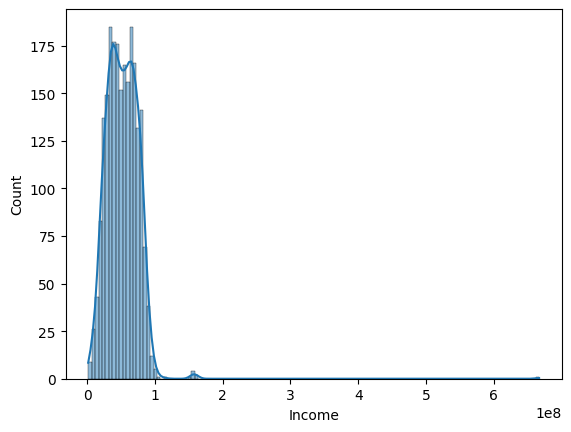

In [11]:
# Checking income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median that is robust to outliers.

In [12]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Columns Grouping Based on Data Type

In [13]:
# Check dataframe values
df.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
854    5794        1974        S3        Menikah  46374000.0        0   
12     2125        1959        S1          Cerai  63033000.0        0   
1803   4168        1966        S1         Lajang  37070000.0        1   
1625   7408        1952        S3        Menikah  54549000.0        0   
2117   8659        1952        S3    Bertunangan  69805000.0        0   
1684  10323        1952        S1        Menikah  49413000.0        0   
631    9624        1958        S3    Bertunangan  65488000.0        0   
859    1031        1989        D3        Menikah  85710000.0        0   
1091   1833        1974        S3         Lajang  39190000.0        1   
651    6728        1985        S1    Bertunangan  29103000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
854          1  2014-03-17        1   408000          0            21000   
12           0  2013-11-15       82   194000      61000           480000   
1803         1  2013-03-20       30   231000       7000           137000   
1625         1  2014-03-03        8   216000       2000             6000   
2117         1  2014-01-21       50   750000      71000           174000   
1684         1  2013-10-25       88   205000       7000            41000   
631          0  2014-06-13       46   603000      45000           207000   
859          0  2013-05-05        5   600000      20000           350000   
1091         0  2014-04-26       91    68000       8000            18000   
651          0  2012-08-27       38    16000          0            17000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
854                 0                 0         17000                  3   
12             225000            112000         30000                  1   
1803             4000             15000         39000                  9   
1625                0                 0          9000                  2   
2117            13000             10000         20000                  2   
1684             3000              2000         46000                  2   
631             36000             18000         54000                  1   
859             29000             30000         33000                  1   
1091            19000              8000         12000                  2   
651              6000              3000          6000                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
854                 7                    1                  7   
12                  3                    4                  8   
1803                5                    1                  8   
1625                5                    1                  4   
2117                6                    8                 11   
1684                4                    2                  5   
631                 3                    4                  6   
859                 6                    9                 10   
1091                2                    1                  4   
651                 1                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
854                   8             0             1             0   
12                    2             0             0             0   
1803                  7             0             0             0   
1625                  7             0             0             0   
2117                  2             0             0             0   
1684                  5             0             0             0   
631                   1             0             0             0   
859                   2             0             0             1   
1091                  5             0             0             0   
651                   9             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostConta

In [14]:
# # Another way of checking unique values (before grouping based on data types)
# for x in df.columns:
#     unique_values_check = list(df[x].unique())
#     unique_values_check.sort()

#     print(f"{x}")
#     print(f"{df[x].unique()}")
#     print()

#     # if len(unique_values_check) >= 10:
#     #     unique_values_check = unique_values_check[:10] + ['.....']
#     #     print(unique_values_check)
#     # else:
#     #     print(unique_values_check)
#     # print()

- Categorical columns (10 columns): 
    - `ID` : nominal
    - `Education` : ordinal
    - `Marital_Status` : nominal
    - `AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns)
    - `Year_Birth, Income, Kidhome, Teenhome, 
    Recency, MntCoke, MntFruits, MntMeatProducts, 
    MntFishProducts, MntSweetProducts, MntGoldProds, 
    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, 
    NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue`

- Date column (1 column) : `Dt_Customer`

In [15]:
# Grouping columns based on data types
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [16]:
# Checking every unique values in categorical columns
for col in cats_cols :
    print()
    print(f"{col} : {df[col].unique()}")


ID : [5524 2174 4141 ... 7270 8235 9405]

Education : ['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

AcceptedCmp1 : [0 1]

AcceptedCmp2 : [0 1]

AcceptedCmp3 : [0 1]

AcceptedCmp4 : [0 1]

AcceptedCmp5 : [0 1]

Complain : [0 1]

Response : [1 0]


In [17]:
# Checking every unique values in numerical columns
for col in nums_cols :
    print()
    print(f"{col} : {df[col].unique()}")


Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Income : [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]

Kidhome : [0 1 2]

Teenhome : [0 1 2]

Recency : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

MntCoke : [ 635000   11000  426000  173000  520000  235000   76000   14000   28000
    5000    6000  194000  233000    3000 1006000   53000   84000 1012000
    4000   86000    1000  867000  384000  270000   36000  684000    8000
  112000  110000   9600

## Handling Outliers

In [18]:
len(df[nums_cols].columns)

18

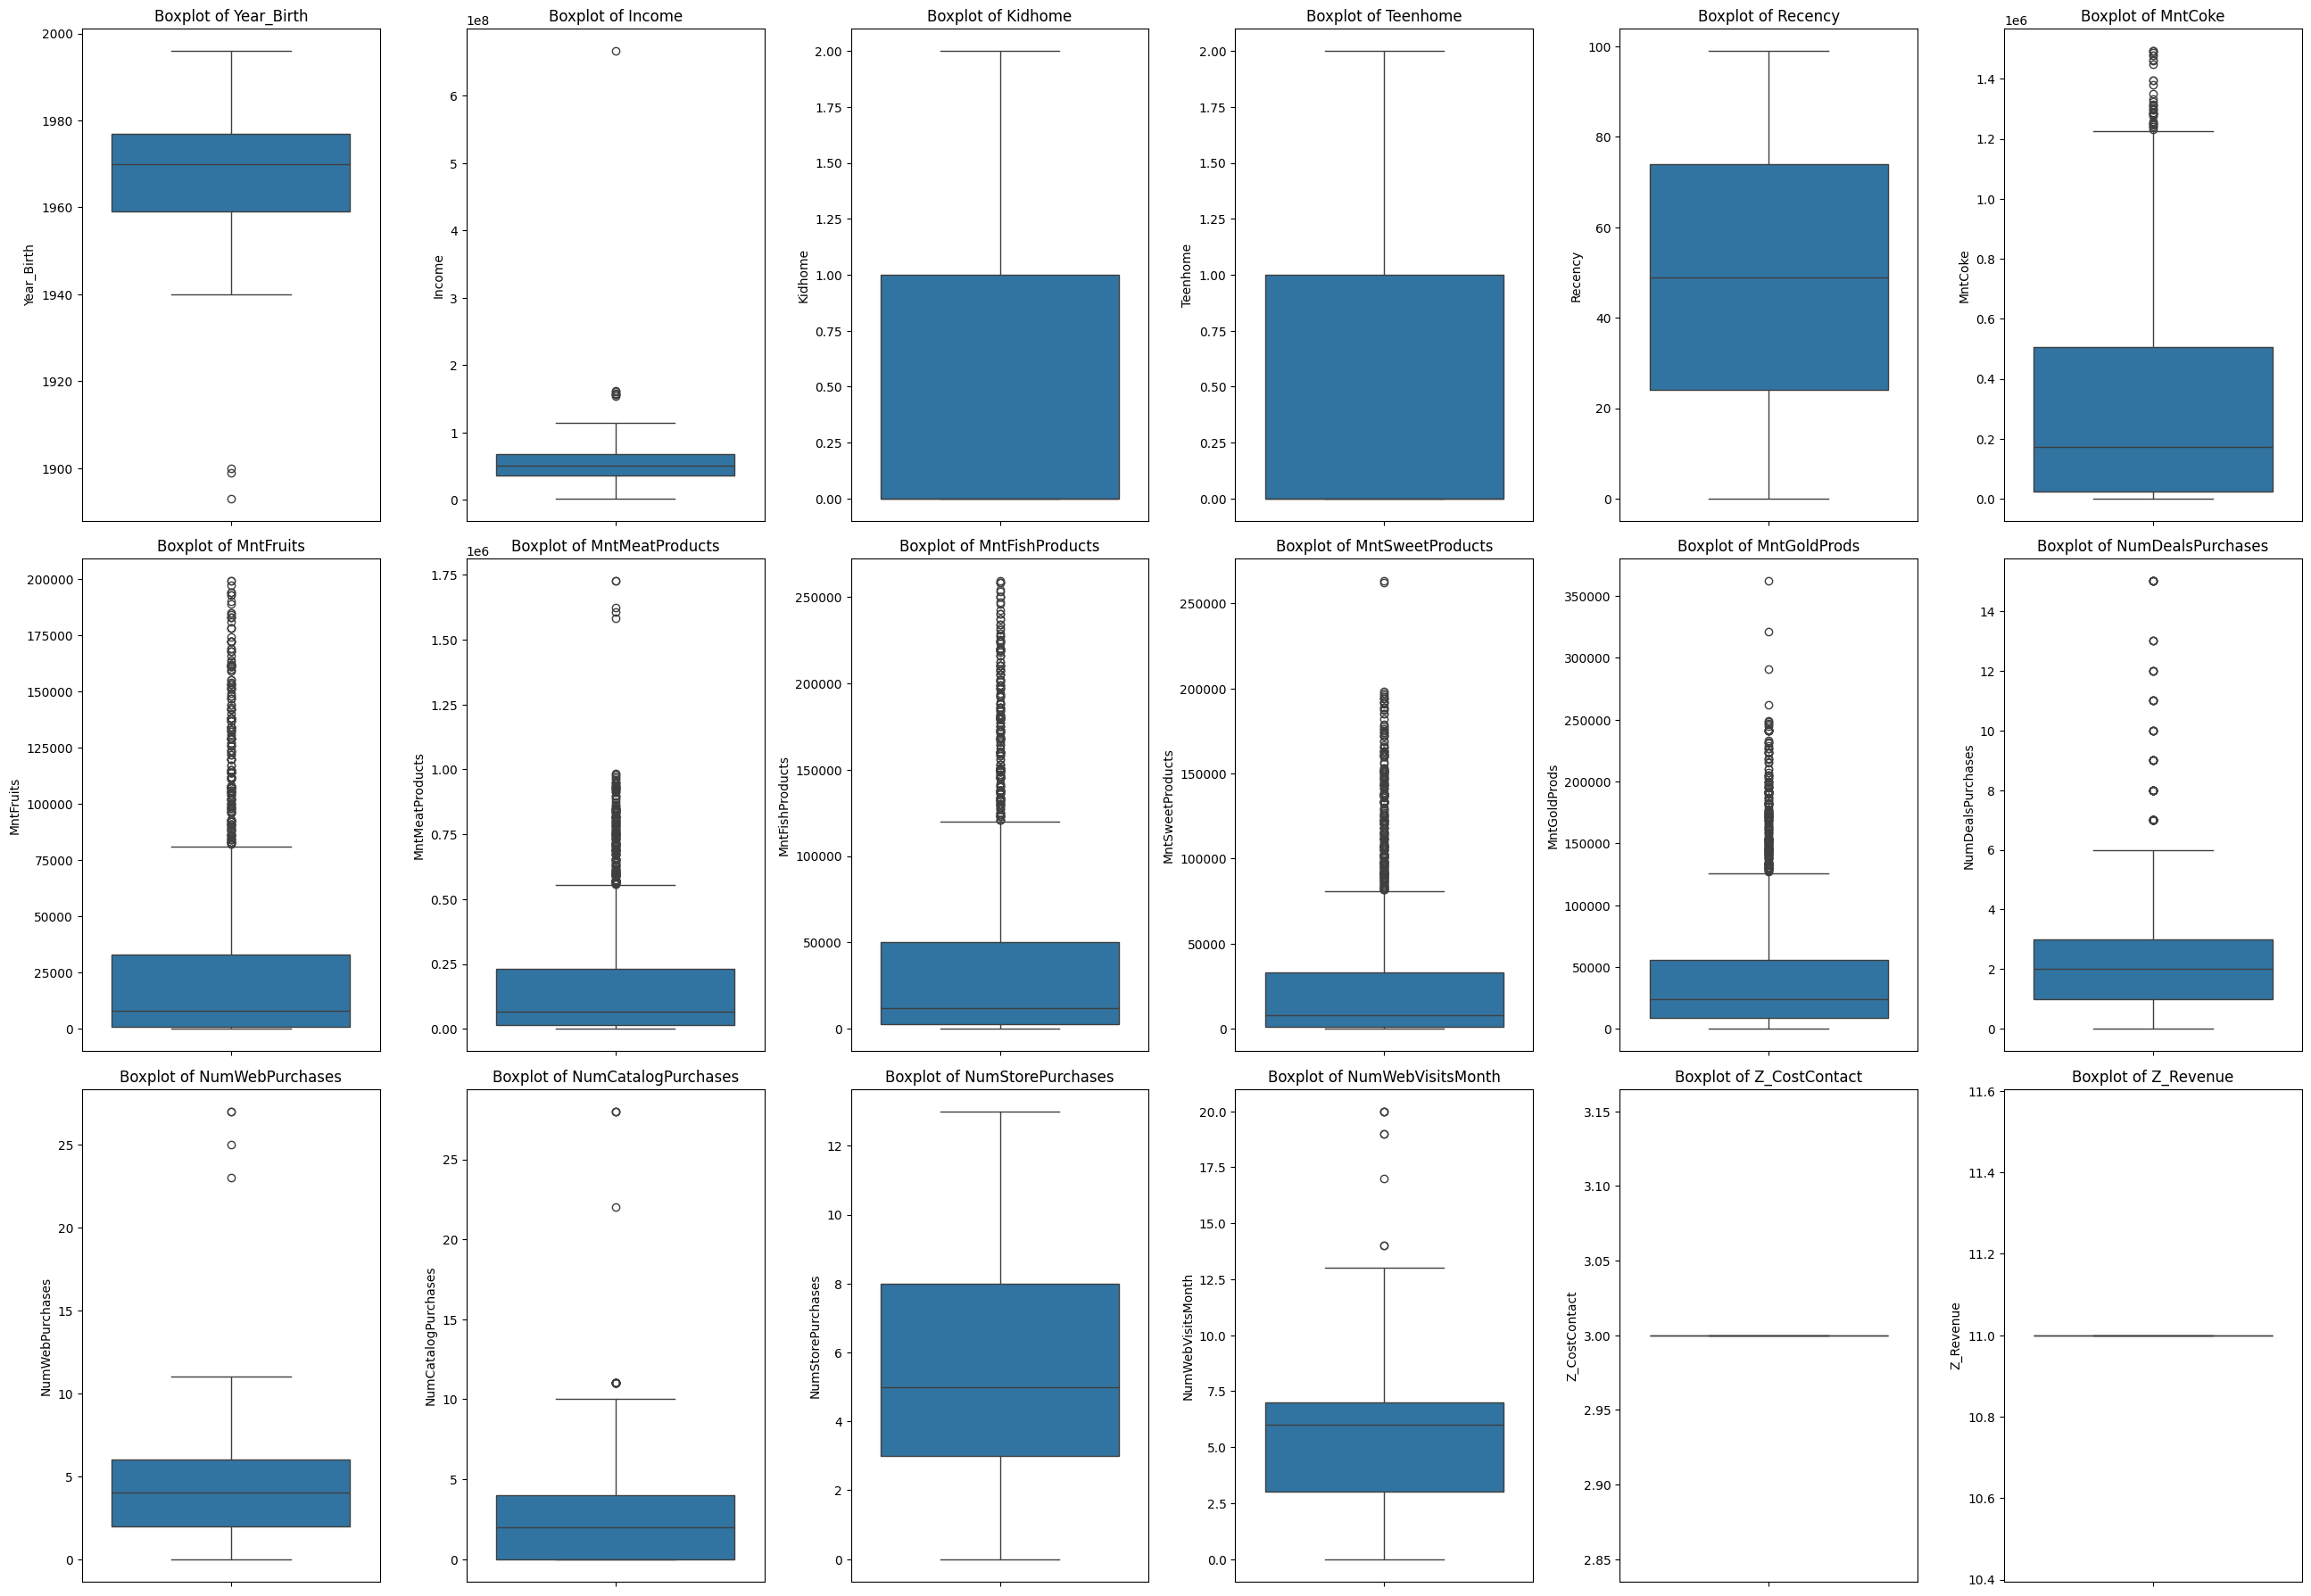

In [19]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

In [20]:
# Outlier detection for original data

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data':outlier,
    'Non-Outlier Data':no_outlier
})

check_outliers


Amount of Rows: 2240
Amount of Outlier Rows : 706
Amount of Non-Outlier Rows : 1534
Percentage of Outliers : 31.52



Column Name  Outlier Exist  Lower Limit  Upper Limit  \
0            Year_Birth           True       1932.0       2004.0   
1                Income           True  -13587750.0  117416250.0   
2               Kidhome          False         -1.5          2.5   
3              Teenhome          False         -1.5          2.5   
4               Recency          False        -51.0        149.0   
5               MntCoke           True    -697000.0    1225000.0   
6             MntFruits           True     -47000.0      81000.0   
7       MntMeatProducts           True    -308000.0     556000.0   
8       MntFishProducts           True     -67500.0     120500.0   
9      MntSweetProducts           True     -47000.0      81000.0   
10         MntGoldProds           True     -61500.0     126500.0   
11    NumDealsPurchases           True         -2.0          6.0   
12      NumWebPurchases           True         -4.0         12.0   
13  NumCatalogPurchases           True         -6.0         10.0   
14    NumStorePurchases          False         -4.5         15.5   
15    NumWebVisitsMonth           True         -3.0         13.0   
16        Z_CostContact          False          3.0          3.0   
17            Z_Revenue          False         11.0         11.0   

    Outlier Data  Non-Outlier Data  
0              3              2237  
1              8              2232  
2              0              2240  
3              0              2240  
4              0              2240  
5             35              2205  
6            227              2013  
7            175              2065  
8            223              2017  
9            248              1992  
10           207              2033  
11            86              2154  
12             4              2236  
13            23              2217  
14             0              2240  
15             8              2232  
16             0              2240  
17             0              2240

**Major Findings:**

There are outliers in the following columns: Year_Birth, Income, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumWebVisitMonth.

- In the `Year_Birth` column, outliers are below 1932.
- In the `Income` column, outliers are above 117M.
- In the `MntCoke` column, outliers are above 1.2M.
- In the `MntFruits` column, outliers are around 81k.
- In the `MntMeatProducts` column, the farthest outlier is around 1.75M.
- In the `MntFishProducts` column, outliers are around 125k to above 250k.
- In the `MntSweetProducts` column, the farthest outlier is around 250k.
- In the `MntGoldProds` column, the farthest outlier is around 350k.
- In the `NumDealsPurchases` column, the farthest outlier is at 15.
- In the `NumWebPurchases` column, outliers are around 25.
- In the `NumCatalogPurchases` column, the farthest outlier is above 25.
- In the `NumWebVisitsMonth` column, the farthest outlier is at 20.

**Steps to be taken in this initial data pre-Processing:**
- Apply `log transformation` for feature scaling and handling outliers, as this transformation minimizes outliers and potentially helps to obtain a bell-shaped/normal distribution. This choice is maybe appropriate due to the limited data available that is only 2240 rows, and it avoids the need to delete data points.

- Alternatively, cleaning the data by removing outliers based on IQR or Z-score, but it will reduce the amount of available data.

In this case, since we want to keep the data as it is because transforming the whole values in many columns will result in changing the conclusion of our data, so the choice will be removing outliers with Z-score method **but not in all of the columns**, only several columns that have really extreme outliers like `Year_Birth`, `Income`, `MntMeatProducts`, `MntSweetProducts`, `NumWebPurchases`, `NumCatalogPurchases`.

In [21]:
# Outlier handling and create outliers-filtered new dataframe

print(f'Rows before removing outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries
    
df_filtered_outliers = df[filtered_entries]

print(f'Rows after removing outliers: {len(df_filtered_outliers)}')

df_filtered_outliers = df[filtered_entries]
df_filtered_outliers

Rows before removing outliers: 2240
Rows after removing outliers: 1861


ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

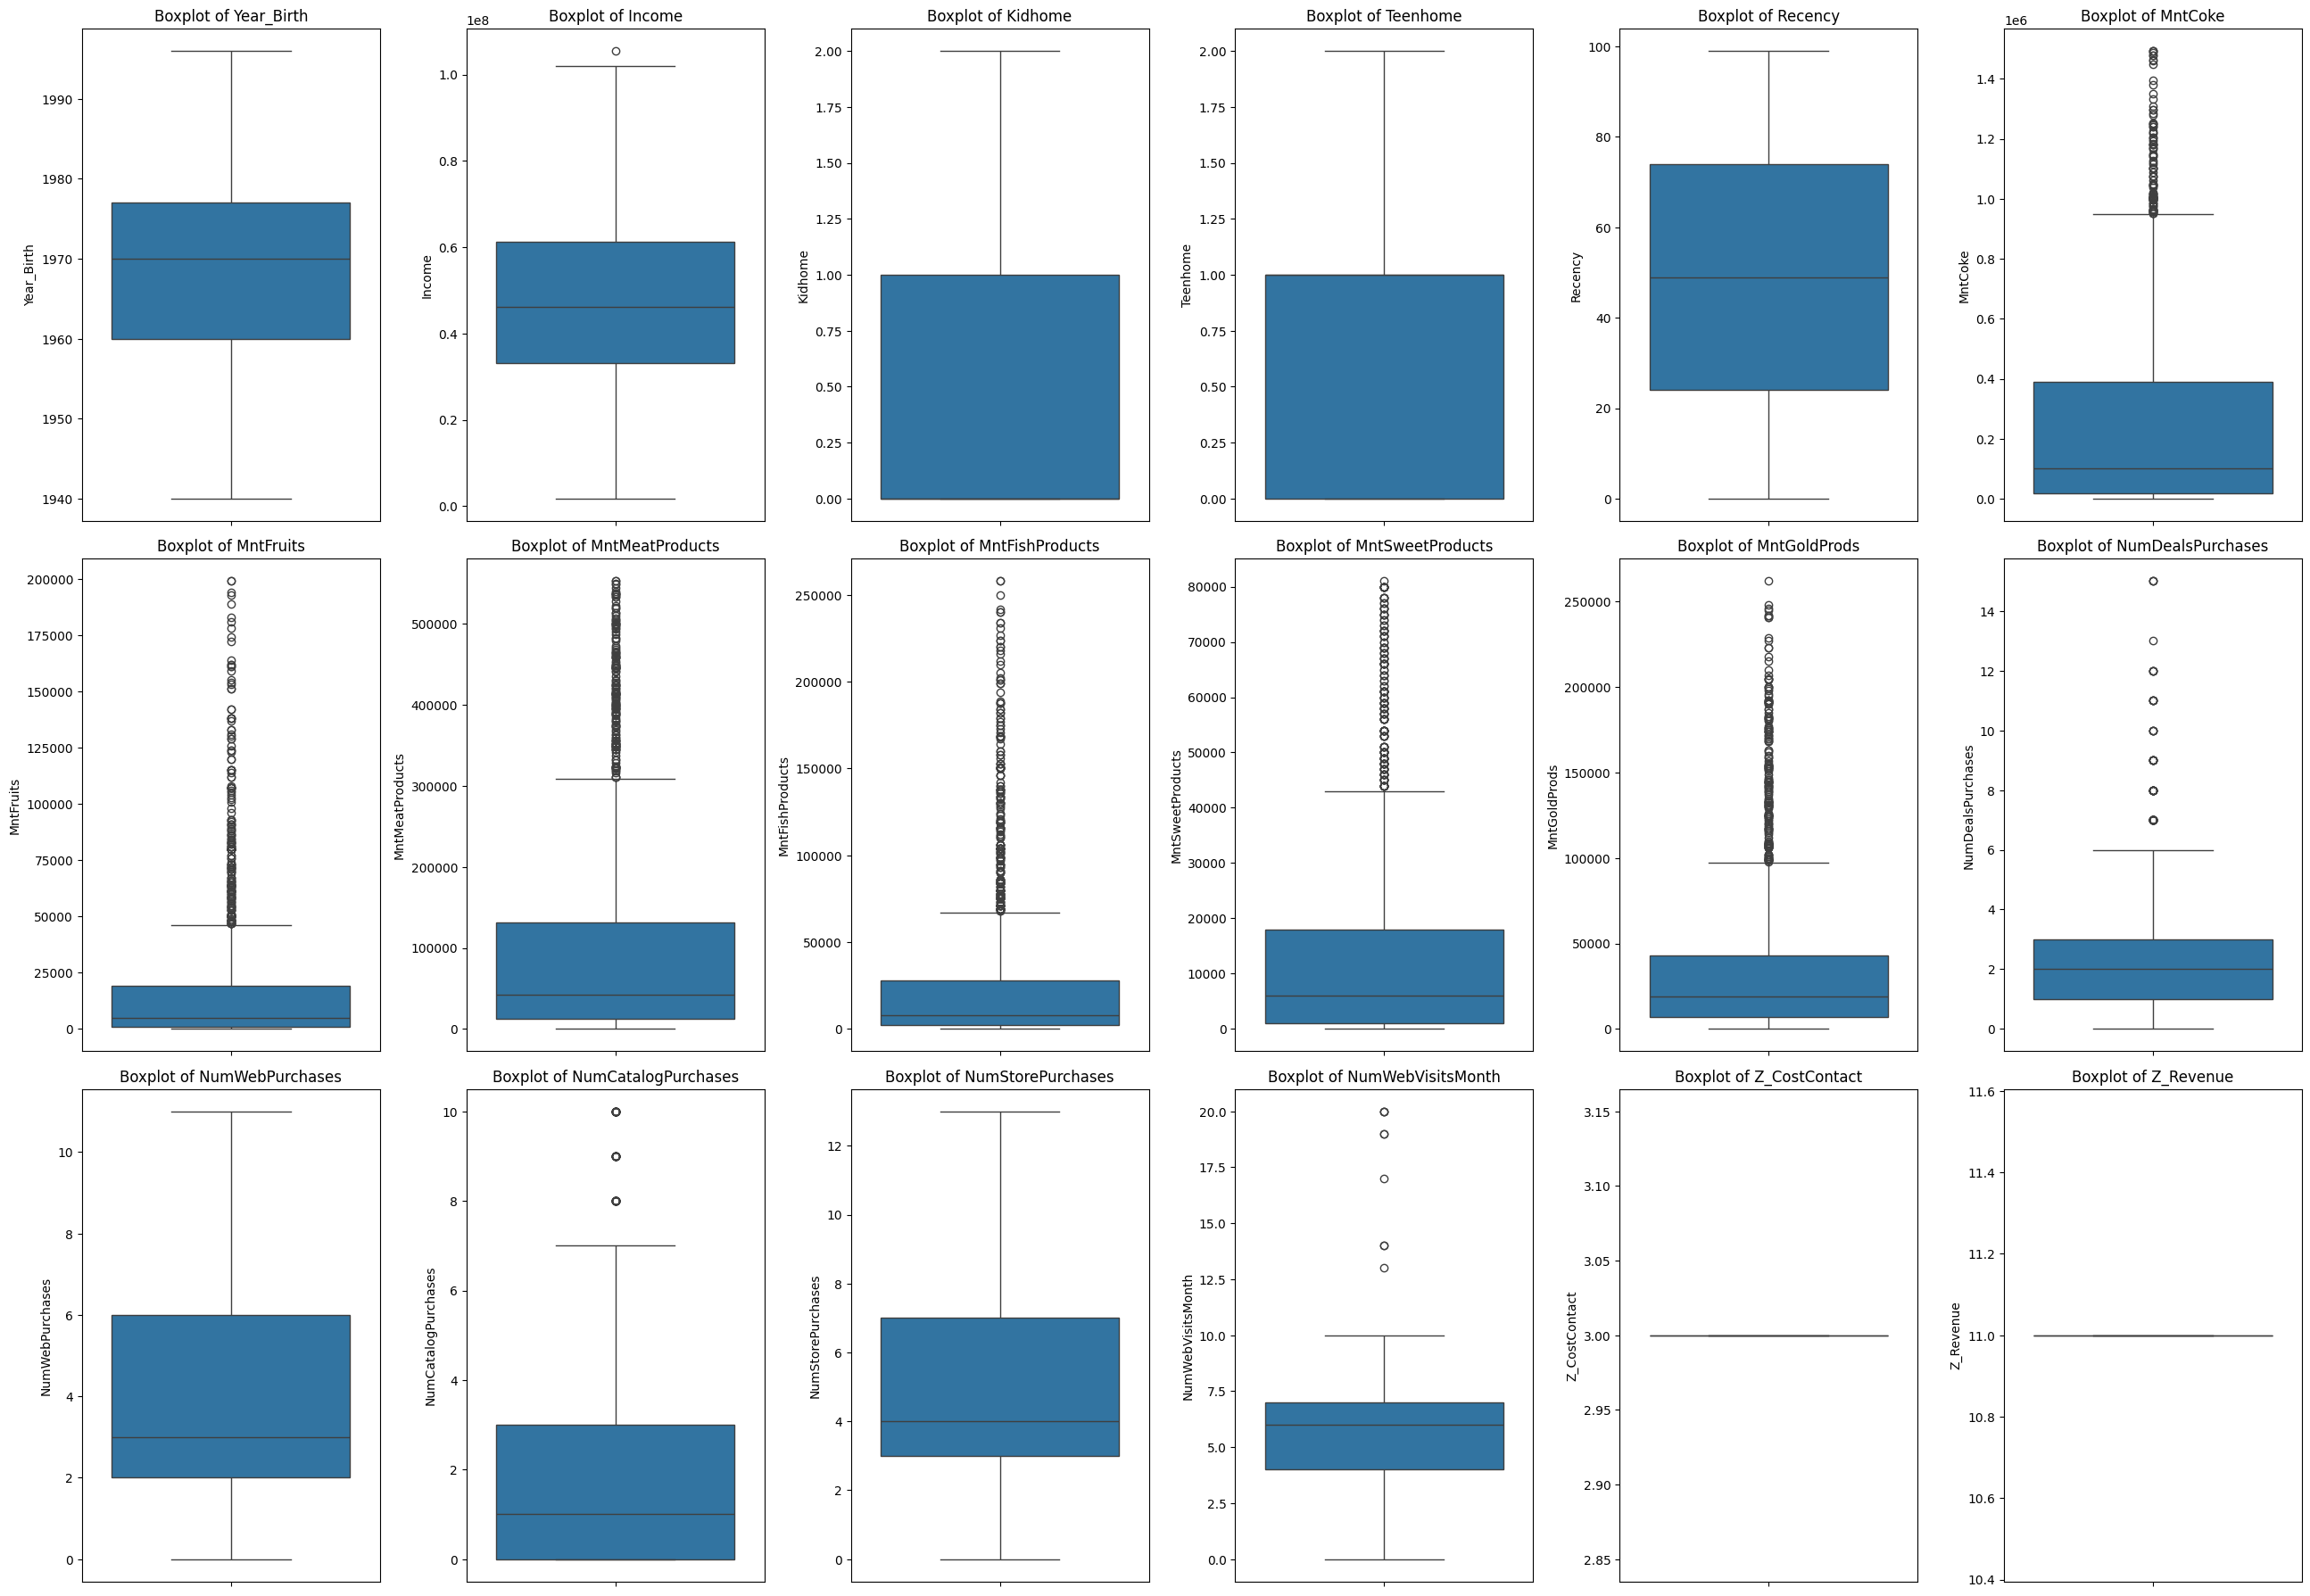

In [22]:
# Check data after filtered
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df_filtered_outliers, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

## Feature Engineering

### Age Column

The `Age` column is created by calculating the age of each customer based on their birth year and current time.

In [23]:
# Age feature engineering

"""
We don't really have the year information in the data for this purpose, so we will just use the year now
"""
# from datetime import datetime
# year_data = datetime.now().year()

year_data = 2024
df_filtered_outliers['Age'] = year_data - df_filtered_outliers['Year_Birth']

### Age Group Column

The `Age_Group` column is created by grouping the `age` column. But first we need check the distribution of age to help with the grouping range.

<Axes: xlabel='Age', ylabel='Count'>

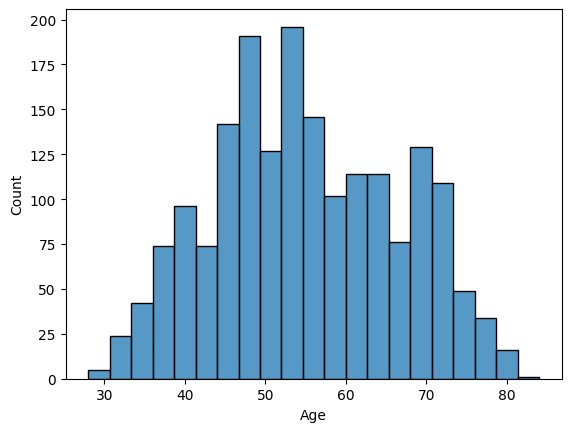

In [24]:
sns.histplot(data=df_filtered_outliers, x='Age')

In [25]:
# Age grouping

def age_group(x):
    if x >= 60:
        return 'Senior Adult'
    elif x >= 40:
        return 'Middle Adult'
    else:
        return 'Young Adult'

df_filtered_outliers['Age_Group'] = df_filtered_outliers['Age'].apply(age_group)

In [26]:
df_filtered_outliers['Age_Group'].value_counts()

Age_Group
Middle Adult    1045
Senior Adult     642
Young Adult      174
Name: count, dtype: int64

### Num_Child Column

The `Num_Child` column is created by summing the values of Kidhome and Teenhome, representing the total number of dependents or children a customer has.

In [27]:
# Number of child the customer have feature engineering

df_filtered_outliers['Num_Child'] = df_filtered_outliers['Kidhome'] + df_filtered_outliers['Teenhome']

In [28]:
df_filtered_outliers['Num_Child'].value_counts()

Num_Child
1    1037
2     410
0     362
3      52
Name: count, dtype: int64

### Membership_Duration Column

The `Membership_Duration` column represents duration of customer membership in year.

In [29]:
df_filtered_outliers['Membership_Duration'] = 2024 - df_filtered_outliers['Dt_Customer'].dt.year

In [30]:
df_filtered_outliers['Membership_Duration'].value_counts()

Membership_Duration
11    989
10    475
12    397
Name: count, dtype: int64

### Total_Acc_Camp Column

The `Total_Cmp` column represents the total number of times each customer responded to the 5 campaigns that were conducted (AcceptedCmp 1 - 5).

In [31]:
df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers['AcceptedCmp1'].astype("int64") + df_filtered_outliers['AcceptedCmp2'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp3'].astype("int64") + df_filtered_outliers['AcceptedCmp4'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp5'].astype("int64")

In [32]:
df_filtered_outliers['Total_Acc_Camp'].value_counts()

Total_Acc_Camp
0    1539
1     245
2      55
3      15
4       7
Name: count, dtype: int64

### Total_Spending Column

The `Total_Spending` column represents the total purchase amount of each customer across all products.

In [33]:
df_filtered_outliers['Total_Spending'] = df_filtered_outliers['MntCoke']+ df_filtered_outliers['MntFruits'] + df_filtered_outliers['MntMeatProducts'] \
                                        + df_filtered_outliers['MntFishProducts'] + df_filtered_outliers['MntSweetProducts'] + df_filtered_outliers['MntGoldProds']

### Total_Purchases Column

The `Total_Purchases` column represents the total purchase amount of each customer across all types of transactions.

In [34]:
df_filtered_outliers['Total_Purchases'] = df_filtered_outliers['NumDealsPurchases'] + df_filtered_outliers['NumWebPurchases'] \
                                        + df_filtered_outliers['NumCatalogPurchases'] + df_filtered_outliers['NumStorePurchases']

### CVR (Conversion Rate) Column

The `CVR` column is calculated as the ratio of `Total Purchases` to the `Number of Web Visits` for each customer. It represents the percentage of website visitors who made purchases.

In [35]:
df_filtered_outliers['CVR'] = np.round(df_filtered_outliers['Total_Purchases'] / df_filtered_outliers['NumWebVisitsMonth'], 2)
df_filtered_outliers['CVR'].fillna(0, inplace=True)
df_filtered_outliers['CVR'].replace([np.inf, -np.inf], 0, inplace=True)

In [36]:
?df.plot

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x00000208B98EBB60>
File:           c:\users\cikal merdeka\appdata\local\programs\python\python312\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : s

<Axes: title={'center': 'Distribution of CVR'}, ylabel='Density'>

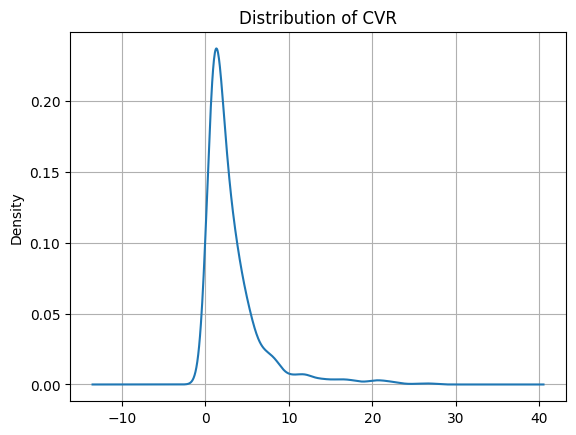

In [37]:
df_filtered_outliers['CVR'].plot(kind='kde', grid=True, title='Distribution of CVR')

# **Exploratory Data Analysis (EDA)**

In [38]:
df_filtered_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861 entries, 1 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1861 non-null   int64         
 1   Year_Birth           1861 non-null   int64         
 2   Education            1861 non-null   object        
 3   Marital_Status       1861 non-null   object        
 4   Income               1861 non-null   float64       
 5   Kidhome              1861 non-null   int64         
 6   Teenhome             1861 non-null   int64         
 7   Dt_Customer          1861 non-null   datetime64[ns]
 8   Recency              1861 non-null   int64         
 9   MntCoke              1861 non-null   int64         
 10  MntFruits            1861 non-null   int64         
 11  MntMeatProducts      1861 non-null   int64         
 12  MntFishProducts      1861 non-null   int64         
 13  MntSweetProducts     1861 non-null   i

## Statistical Summary

In [39]:
df_filtered_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Num_Child', 'Membership_Duration',
       'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR'],
      dtype='object')

In [40]:
new_nums_cols = ['Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']
new_cats_cols = ['Age_Group']

desc_cols = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']

# Additional column grouping only for easily visible comparison
product_spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_type_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [41]:
# Product spending desc
df_filtered_outliers[product_spending_cols + ['Total_Spending']].describe().transpose()

count           mean            std     min      25%  \
MntCoke           1861.0  250929.607738  315826.131031     0.0  18000.0   
MntFruits         1861.0   17241.805481   29502.972217     0.0   1000.0   
MntMeatProducts   1861.0   97452.982268  124804.873802     0.0  13000.0   
MntFishProducts   1861.0   25399.247716   42295.989533     0.0   2000.0   
MntSweetProducts  1861.0   13378.291241   18221.128038     0.0   1000.0   
MntGoldProds      1861.0   36454.594304   45760.957987     0.0   7000.0   
Total_Spending    1861.0  440856.528748  477667.786596  5000.0  57000.0   

                       50%       75%        max  
MntCoke           100000.0  390000.0  1493000.0  
MntFruits           5000.0   19000.0   199000.0  
MntMeatProducts    42000.0  132000.0   553000.0  
MntFishProducts     8000.0   28000.0   258000.0  
MntSweetProducts    6000.0   18000.0    81000.0  
MntGoldProds       19000.0   43000.0   262000.0  
Total_Spending    231000.0  734000.0  2231000.0

In [42]:
# Product spending desc (sum)
pd.DataFrame(df_filtered_outliers[product_spending_cols + ['Total_Spending']].sum().rename('Sum'))

Sum
MntCoke           466980000
MntFruits          32087000
MntMeatProducts   181360000
MntFishProducts    47268000
MntSweetProducts   24897000
MntGoldProds       67842000
Total_Spending    820434000

In [43]:
# Purchase type desc
df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].describe().transpose()

count       mean       std  min  25%   50%   75%   max
NumDealsPurchases    1861.0   2.465879  1.865228  0.0  1.0   2.0   3.0  15.0
NumWebPurchases      1861.0   3.787211  2.619379  0.0  2.0   3.0   6.0  11.0
NumCatalogPurchases  1861.0   2.002687  2.328527  0.0  0.0   1.0   3.0  10.0
NumStorePurchases    1861.0   5.309511  3.066794  0.0  3.0   4.0   7.0  13.0
Total_Purchases      1861.0  13.565287  7.418566  0.0  7.0  12.0  20.0  35.0

In [44]:
# Purchase type desc (sum)
pd.DataFrame(df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].sum().rename('Sum'))

Sum
NumDealsPurchases     4589
NumWebPurchases       7048
NumCatalogPurchases   3727
NumStorePurchases     9881
Total_Purchases      25245

In [45]:
df_filtered_outliers[desc_cols].describe().transpose()

count          mean           std        min  \
Income               1861.0  4.699597e+07  1.856569e+07  1730000.0   
Recency              1861.0  4.867544e+01  2.893846e+01        0.0   
Membership_Duration  1861.0  1.095809e+01  6.834176e-01       10.0   
Age                  1861.0  5.500430e+01  1.146692e+01       28.0   
Num_Child            1861.0  1.081677e+00  7.212538e-01        0.0   
Total_Acc_Camp       1861.0  2.299839e-01  5.743472e-01        0.0   
Total_Spending       1861.0  4.408565e+05  4.776678e+05     5000.0   
Total_Purchases      1861.0  1.356529e+01  7.418566e+00        0.0   
CVR                  1861.0  3.285562e+00  3.657562e+00        0.0   

                             25%         50%         75%          max  
Income               33178000.00  46102000.0  61209000.0  105471000.0  
Recency                    24.00        49.0        74.0         99.0  
Membership_Duration        10.00        11.0        11.0         12.0  
Age                        47.00        54.0        64.0         84.0  
Num_Child                   1.00         1.0         1.0          3.0  
Total_Acc_Camp              0.00         0.0         0.0          4.0  
Total_Spending          57000.00    231000.0    734000.0    2231000.0  
Total_Purchases             7.00        12.0        20.0         35.0  
CVR                         1.12         2.0         4.0         27.0

**Major Findings:**

- The majority of customers have an income of Rp46,999,597 per year.
- Most customers will shop again approximately 1.5 months after their last purchase.
- The majority of customers have been members for 11 years.
- Most customers have only one child.
- The majority of customers make 12 purchase transactions, with the highest number through Store Purchase.
- Most customers spend Rp.231,000, with the highest spending on Coke.
- The majority of customers did not receive the campaign.
- The conversion rate from web visits to purchases for the majority of customers is only 2.0%.

In [46]:
df_filtered_outliers[cats_cols + new_cats_cols].describe(exclude='int64').transpose()

count unique           top  freq
Education       1861      5            S1   914
Marital_Status  1861      6       Menikah   725
Age_Group       1861      3  Middle Adult  1045

In [47]:
df_filtered_outliers[date_cols].describe().transpose()

count                           mean                  min  \
Dt_Customer  1861  2013-07-15 00:58:48.425577728  2012-07-30 00:00:00   

                             25%                  50%                  75%  \
Dt_Customer  2013-01-22 00:00:00  2013-07-17 00:00:00  2014-01-05 00:00:00   

                             max  
Dt_Customer  2014-06-29 00:00:00

## Univariate Analysis

In [48]:
len(desc_cols)

9

In [49]:
df_filtered_outliers.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
183   10796        1984        S2        Menikah  30477000.0        1   
844    5332        1960        D3        Menikah  82504000.0        0   
819    7034        1978        D3        Menikah  25804000.0        1   
1166   6116        1968        D3        Menikah  48985000.0        0   
1104   4444        1972        S1        Menikah  30023000.0        1   
1379  10475        1970        S2    Bertunangan  51381500.0        0   
955   10031        1976        S3        Menikah  16927000.0        1   
588     254        1955        S1    Bertunangan  53863000.0        0   
2161    902        1980        S1    Bertunangan  62994000.0        1   
148    5885        1973        D3        Menikah  35688000.0        2   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
183          0  2014-01-22       16    47000       1000             6000   
844          0  2013-07-27        2   362000      50000           431000   
819          0  2013-09-01       34     8000       7000             9000   
1166         1  2013-07-05       13    19000      13000            18000   
1104         0  2014-03-24       28    11000          0            16000   
1379         1  2013-04-01       39   187000       5000            65000   
955          1  2013-02-10       50    20000       2000            23000   
588          1  2014-05-17        4   399000       4000            30000   
2161         0  2014-03-04       74   224000      12000            48000   
148          1  2012-08-22       94    73000       3000            90000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
183                 0                 0         12000                  1   
844            134000             35000         54000                  1   
819             13000              6000         12000                  2   
1166            10000              7000          8000                  1   
1104             7000              6000         21000                  1   
1379            26000             20000         14000                  2   
955              3000              1000          4000                  5   
588              6000              4000         30000                  3   
2161             4000             12000         12000                  1   
148             12000              1000         32000                  7   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
183                 1                    1                  3   
844                 3                    6                  7   
819                 2                    0                  3   
1166                1                    1                  3   
1104                2                    0                  3   
1379                4                    2                  6   
955                 3                    0                  4   
588                 7                    1                  7   
2161                6                    2                  4   
148                 4                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
183                   6             0             0             0   
844                   1             0             0             0   
819                   8             0             0             0   
1166                  3             0             0             0   
1104                  8             0             0             0   
1379                  5             0             0             0   
955                   8             0             0             0   
588                   7             0             1             0   
2161                  6             0             0             0   
148                   8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostConta

### Numerical Columns

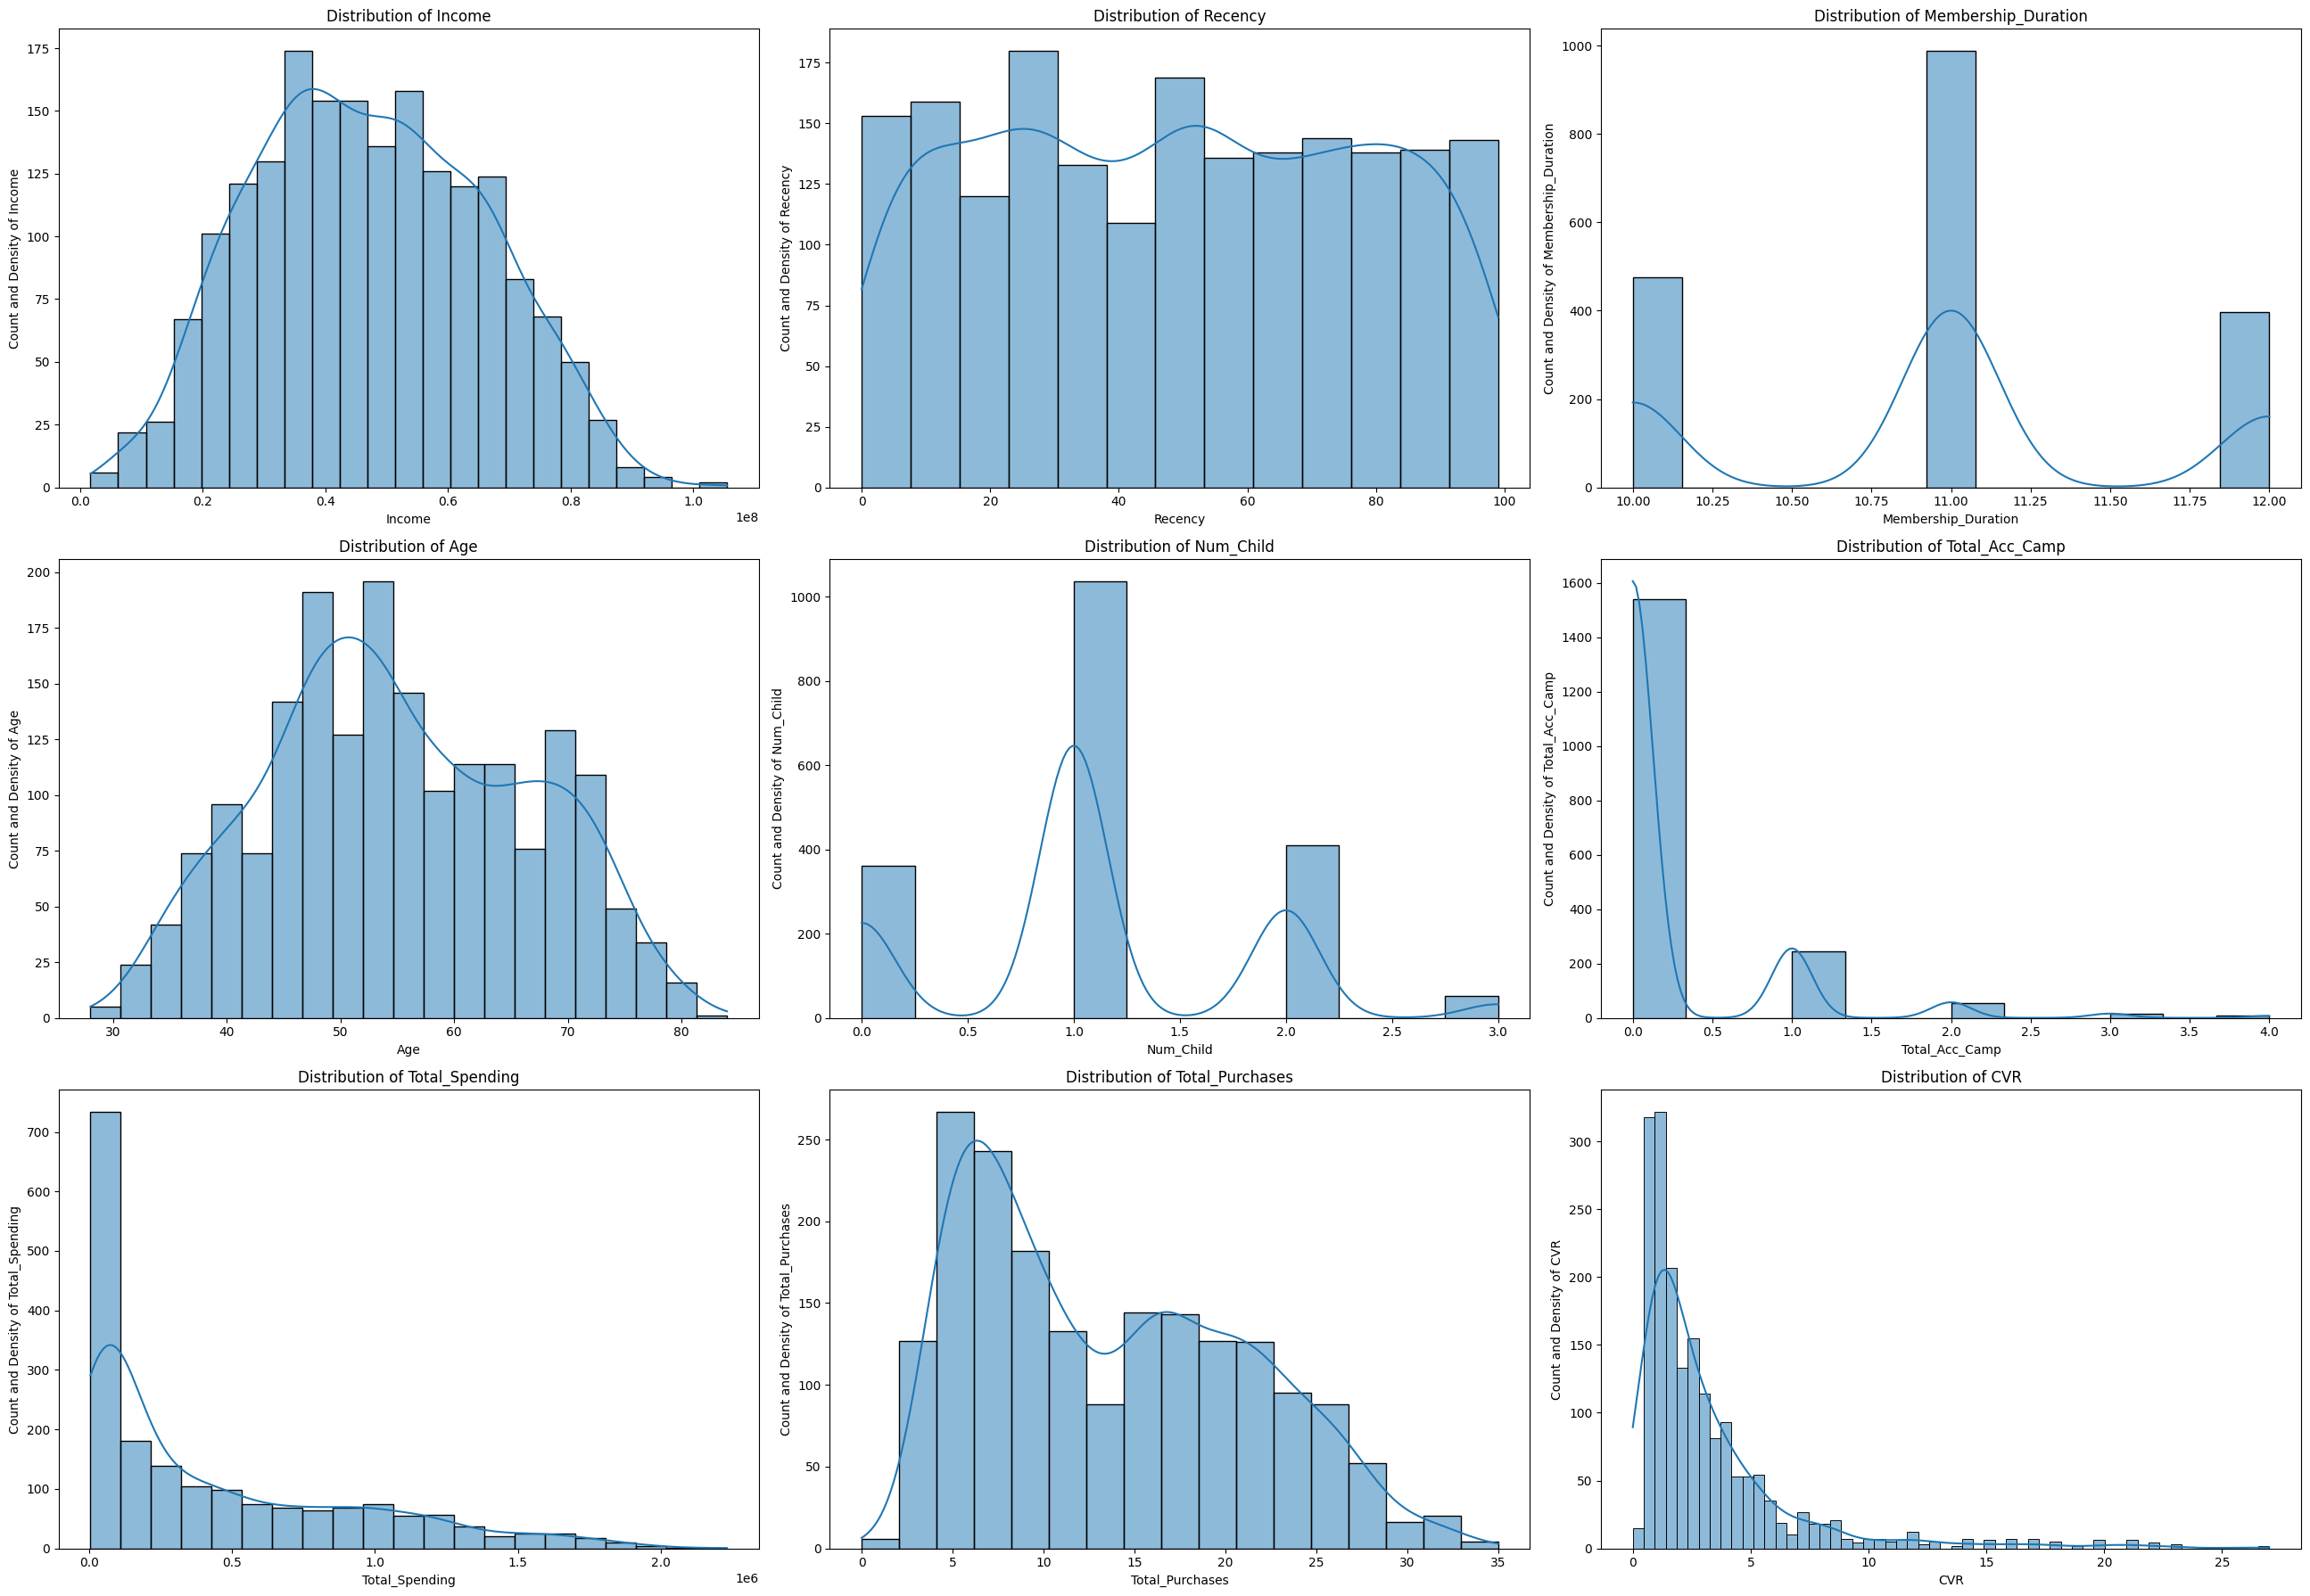

In [50]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))
ax = ax.flatten()

for i in range(len(desc_cols)) :
  sns.histplot(data = df_filtered_outliers, ax=ax[i], x=desc_cols[i], kde=True)
  ax[i].set_title(f'Distribution of {desc_cols[i]}')
  ax[i].set_ylabel(f'Count and Density of {desc_cols[i]}')
  ax[i].set_xlabel(f'{desc_cols[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

In [51]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols + new_nums_cols:
    data = df_filtered_outliers[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols + new_nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Z_CostContact', 'Z_Revenue']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Kidhome', 'Teenhome']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0            Year_Birth    -0.110    -0.793   
1                Income     0.127    -0.648   
2               Kidhome     0.380    -0.960   
3              Teenhome     0.239    -1.020   
4               Recency     0.018    -1.203   
5               MntCoke     1.531     1.771   
6             MntFruits     2.979    10.288   
7       MntMeatProducts     1.756     2.372   
8       MntFishProducts     2.675     7.653   
9      MntSweetProducts     1.789     2.571   
10         MntGoldProds     2.130     4.517   
11    NumDealsPurchases     2.083     6.623   
12      NumWebPurchases     0.841    -0.076   
13  NumCatalogPurchases     1.504     1.853   
14    NumStorePurchases     0.977    -0.081   
15    NumWebVisitsMonth     0.246     3.494   
16        Z_CostContact       NaN       NaN   
17            Z_Revenue       NaN       NaN   
18                  Age     0.110    -0.793   
19            Num_Child     0.324    -0.035   
20       Total_Acc_Camp     3.100    11.472   
21       Total_Spending     1.150     0.353   
22      Total_Purchases     0.468    -0.868   
23                  CVR     2.892    10.327   

                          Type of Distribution  
0              Normal Distribution (Symmetric)  
1              Normal Distribution (Symmetric)  
2                         Bimodal Distribution  
3                         Bimodal Distribution  
4              Normal Distribution (Symmetric)  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                Moderately Positively Skewed  
13                    Highly Positively Skewed  
14                Moderately Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16                        Uniform Distribution  
17                        Uniform Distribution  
18             Normal Distribution (Symmetric)  
19  Moderately Normal Distribution (Symmetric)  
20                    Highly Positively Skewed  
21                    Highly Positively Skewed  
22  Moderately Normal Distribution (Symmetric)  
23                    Highly Positively Skewed

Distribution types of each column can be seen in above dataframe.

### Categorical Columns

In [52]:
len(df_filtered_outliers[cats_cols].columns)

10

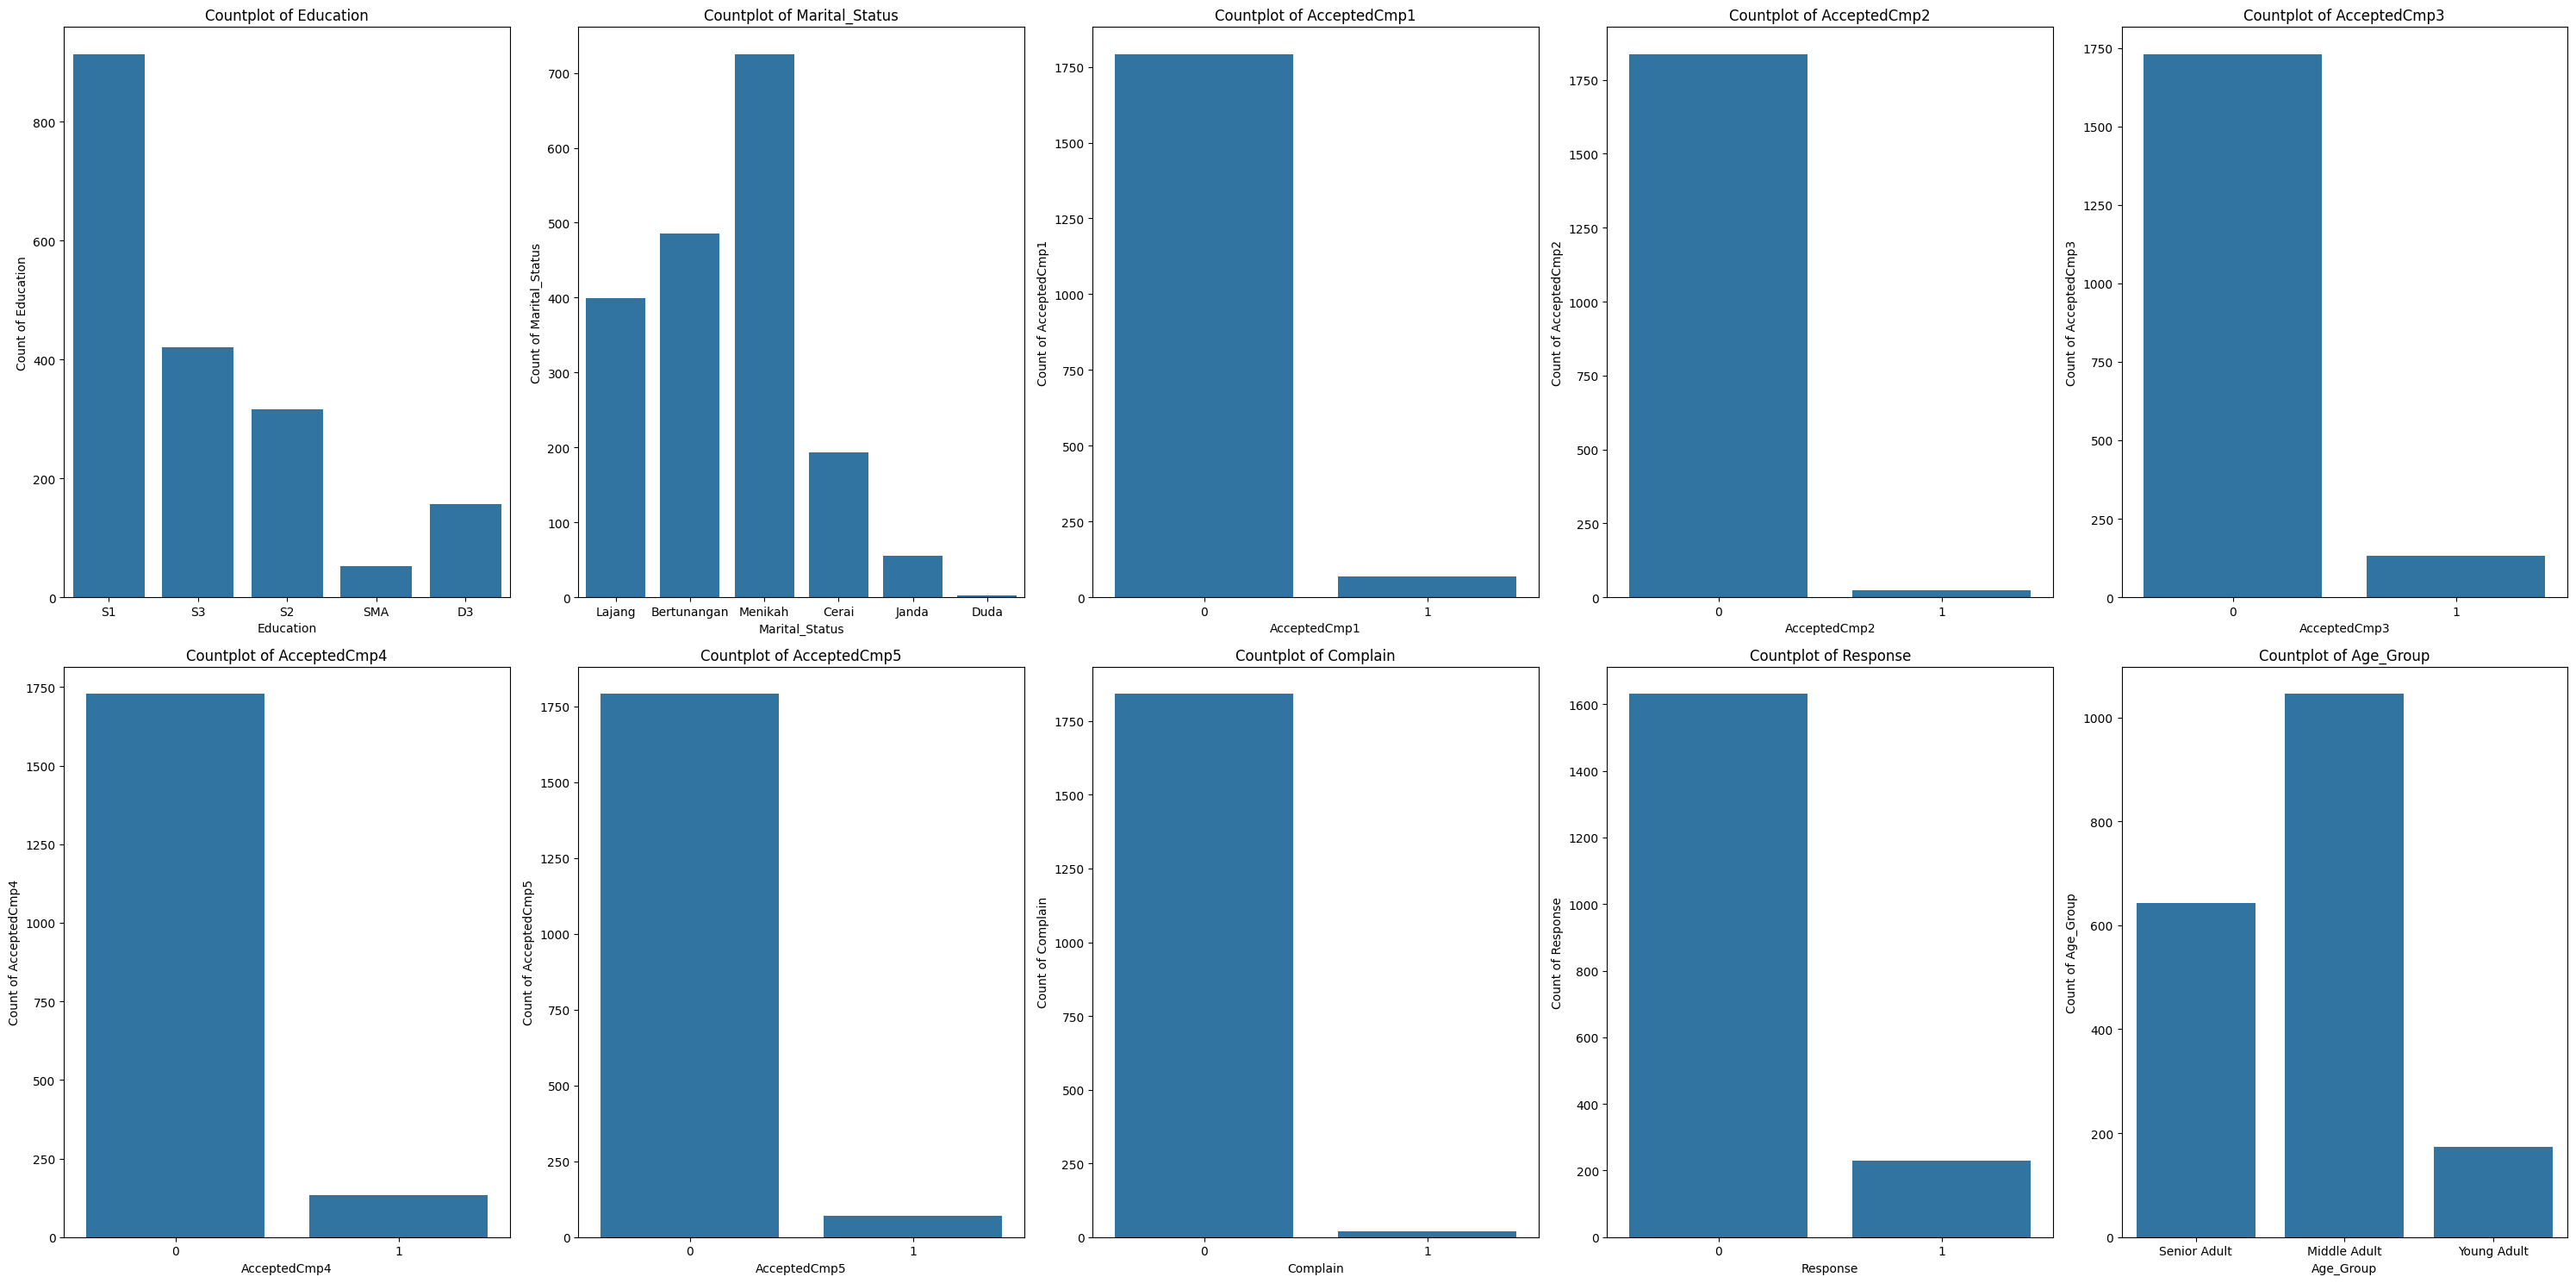

In [53]:
# Coutplot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
ax = ax.flatten()

cats_cols_excluding_id = [col for col in cats_cols if col != 'ID']
cats_cols_excluding_id.extend(new_cats_cols)

for i in range(len(cats_cols_excluding_id)) :
    sns.countplot(data=df_filtered_outliers, ax=ax[i], x=cats_cols_excluding_id[i])
    ax[i].set_title(f'Countplot of {cats_cols_excluding_id[i]}')
    ax[i].set_ylabel(f'Count of {cats_cols_excluding_id[i]}')
    ax[i].set_xlabel(f'{cats_cols_excluding_id[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

**Major Findings :**

- The majority of customers have at least a Bachelor's degree.
- The majority of customers are married.
- The majority of customers do not file complaints.
- The majority of customers do not respond to the campaign.
- The majority of customers are middle adults (age 40-60).

## Bivariate Analysis

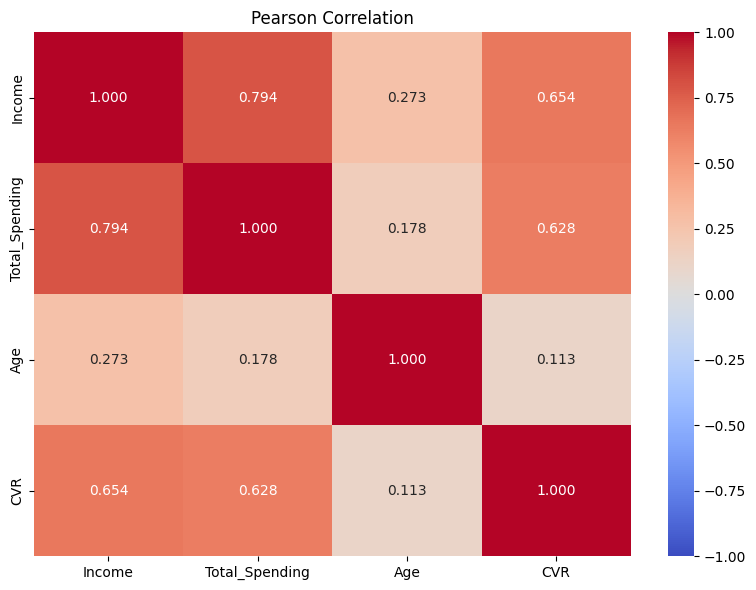

In [54]:
# Correlation heatmap of numerical features and target

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']
# cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
plt.figure(figsize=(8,6))
sns.heatmap(data=df_filtered_outliers[included_col].corr(), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()

**Major Findings :**

- Most of the features have positive correlation to each other.
- `Income` and `Total_Spending` have high/strong positive correlation to `CVR` while `Age` have low/weak positive correlation to `CVR`.

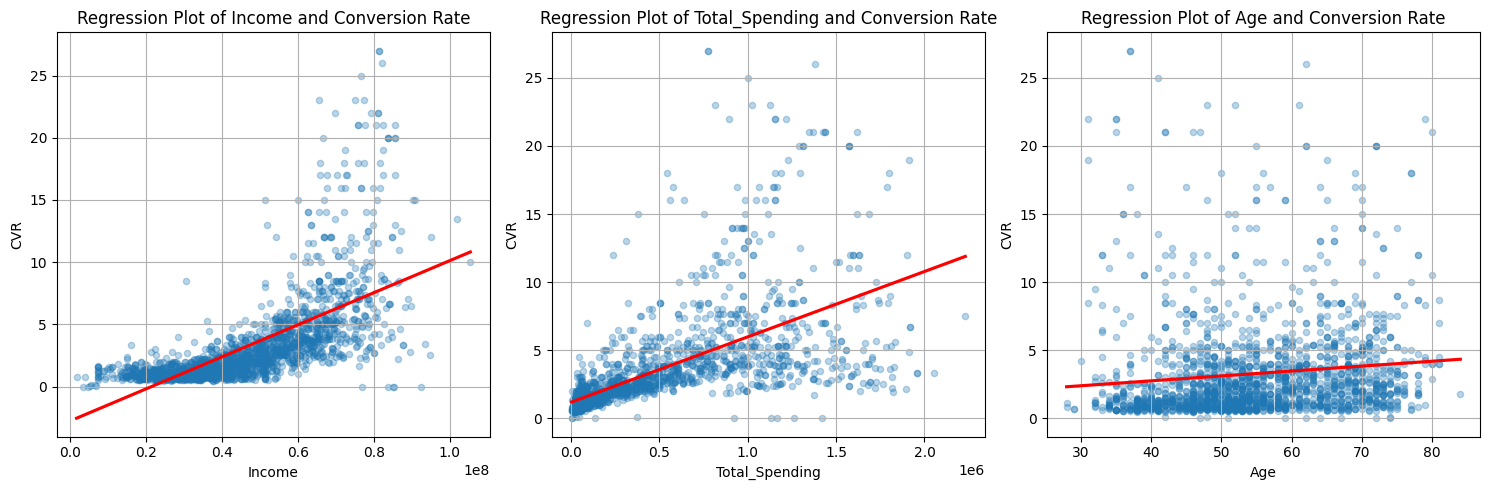

In [55]:
# Regplot of CVR vs Income, Total Spending, and Age

included_col = ['Income', 'Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='CVR', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Conversion Rate')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Overall, income and total spending have a positive correlation with purchase conversion rate (CVR).
    - This means that the higher the income and total spending, the higher the likelihood of conversion or purchase from potential consumers.
    - This positive correlation may be caused by several factors, such as better financial ability to meet the needs or desires of customers, as well as a high perceived value of the products or services offered. Therefore, companies can pay attention to and optimize their marketing strategies by considering target audiences with higher incomes and total spending, thereby increasing conversion opportunities and the overall success of marketing campaigns.

- Meanwhile, age features tend to have a non-significant correlation with the conversion rate. This means that age is not a dominant factor influencing consumer decisions to convert or make purchases.

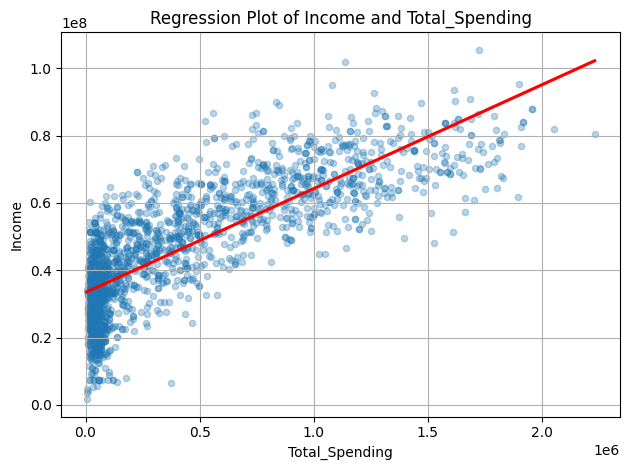

In [56]:
# Regplot of Income vs Total Spending

sns.regplot(data=df_filtered_outliers, x='Total_Spending', y='Income', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
plt.title(f'Regression Plot of Income and Total_Spending')
plt.grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Income and total spending have a strong positive correlation.
- This indicates a significant relationship between an individual's income level and their spending patterns. The higher someone's income, the more likely they are to have higher spending.

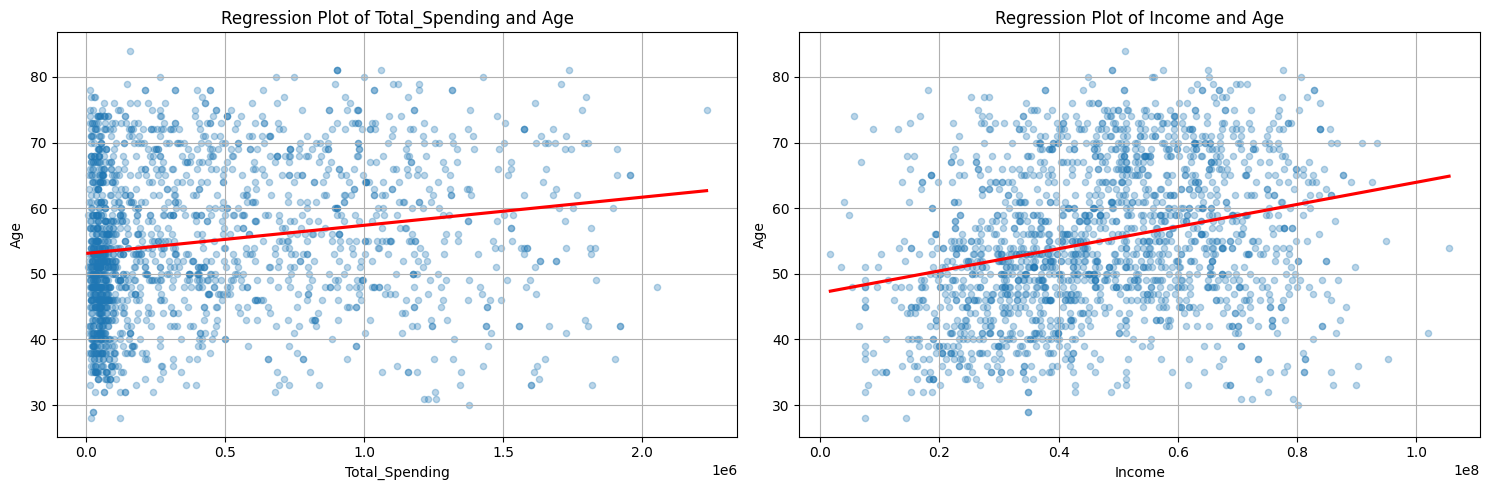

In [57]:
# Regplot of Age vs Total Spending and Income

included_col = ['Total_Spending', 'Income']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='Age', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Age')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Age has a weak positive correlation and even lacks significant correlation with the income (Income) or total spending features.
- This means that age does not directly influence an individual's income level or spending patterns. However, companies still need to consider age as part of their marketing strategy. Although the weak correlation suggests that age may not be a primary determinant factor in consumer decisions.

## Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

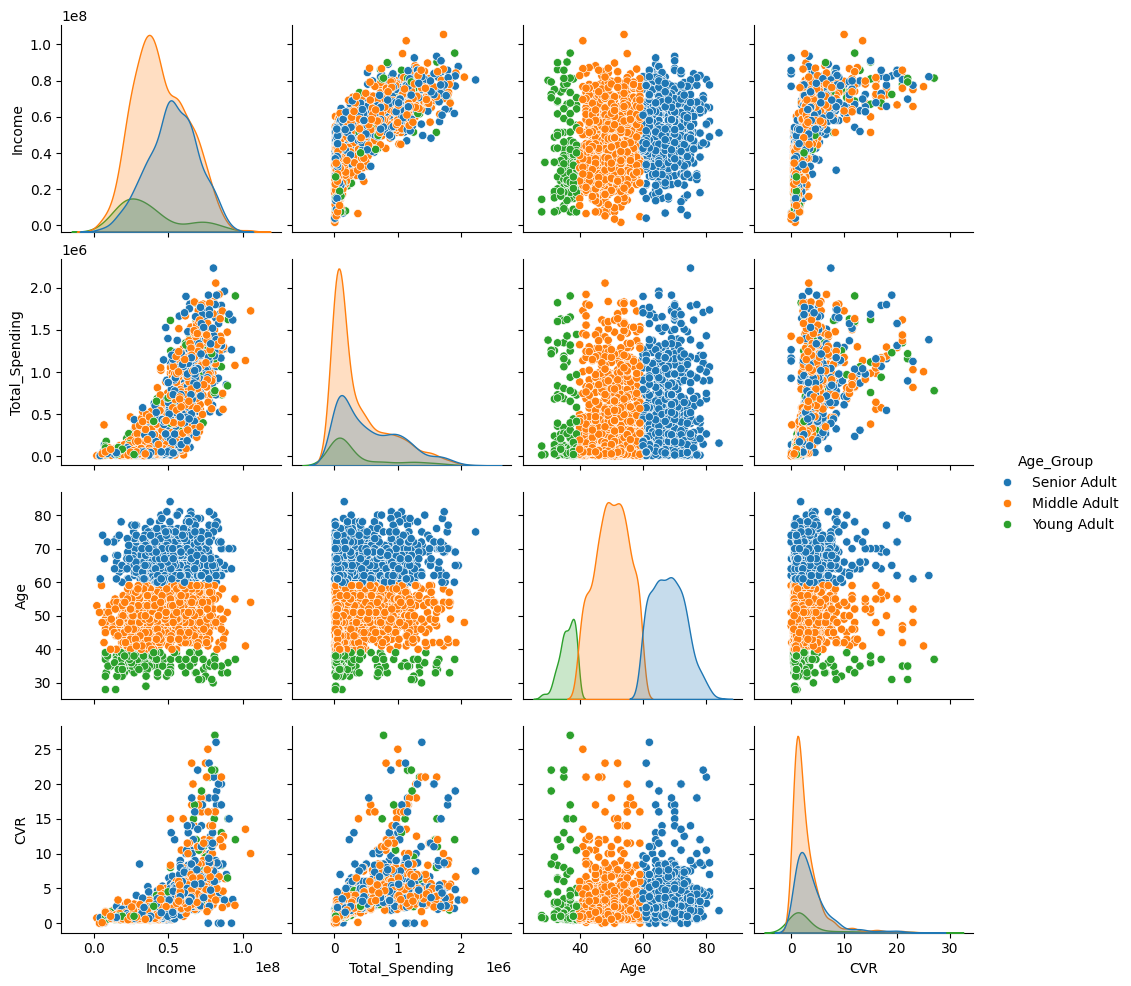

In [58]:
# Pairplot with hue Age Group
plt.figure(figsize=(15,15))

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']

sns.pairplot(data=df_filtered_outliers[included_col +['Age_Group']], hue='Age_Group', diag_kind='kde')
plt.show()

There aren't any interesting insights or significant patterns from the separation of Age Group between Income, Total Spending, and CVR. This further indicates that age may not be the dominant factor influencing the relationship between Income, Total Spending, and the conversion rate (CVR).

# **Task 2 : Data Pre-Processing**

In [59]:
df_preprocessed = df_filtered_outliers.copy()
df_preprocessed

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

## Feature Encoding

In [60]:
encoded_features = ['Education', 'Marital_Status', 'Age_Group']

for col in encoded_features :
    print(col)
    print(df_preprocessed[col].unique())
    print()

Education
['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status
['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

Age_Group
['Senior Adult' 'Middle Adult' 'Young Adult']



In [61]:
# Label encoding for Education and Age_Group
df_preprocessed['Education'] = df_preprocessed['Education'].replace({'SMA' : 0,
                                                                    'D3' : 1,
                                                                    'S1' : 2,
                                                                    'S2' : 3,
                                                                    'S3' : 4})


df_preprocessed['Age_Group'] = df_preprocessed['Age_Group'].replace({'Young Adult' : 0,
                                                                    'Middle Adult' : 1,
                                                                    'Senior Adult' : 2})

In [62]:
# One-hot encoding for Marital_Status
onehots = pd.get_dummies(df_preprocessed['Marital_Status'], prefix='Marital_Status')
onehots = onehots.astype(int)
df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

In [63]:
df_preprocessed.sample(5)

ID  Year_Birth  Education Marital_Status      Income  Kidhome  \
863   4271        1989          1    Bertunangan  38683000.0        1   
1237  9757        1972          2    Bertunangan  84906000.0        0   
1466  4690        1953          2        Menikah  50725000.0        0   
642   2131        1959          4          Cerai  62859000.0        0   
1609  9971        1964          4        Menikah  65526000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
863          0  2012-10-04       80    46000      35000            69000   
1237         0  2013-10-04       98   997000      15000           414000   
1466         1  2013-02-13       45   443000      10000            75000   
642          1  2012-12-30       37  1063000      89000           102000   
1609         1  2014-04-11       22   397000      19000            69000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
863             84000             41000         66000                  6   
1237            99000             30000         76000                  1   
1466                0             10000         48000                  4   
642             16000             12000         25000                  4   
1609            12000                 0          9000                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
863                 4                    1                  6   
1237                5                    6                 12   
1466                8                    1                  8   
642                 9                    4                  6   
1609                4                    4                  8   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
863                   7             0             0             0   
1237                  2             0             1             1   
1466                  8             0             0             0   
642                   6             0             0             0   
1609                  2             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
863              0             0         0              3         11   
1237             0             1         0              3         11   
1466             0             0         0              3         11   
642              0             0         0              3         11   
1609             0             0         0              3         11   

      Response  Age  Age_Group  Num_Child  Membership_Duration  \
863          0   35          0          1                   12   
1237         0   52          1          0                   11   
1466         0   71          2          1                   11   
642          0   65          2          1                   12   
1609         0   60          2          1                   10   

      Total_Acc_Camp  Total_Spending  Total_Purchases    CVR  \
863                0          341000               17   2.43   
1237               3         1631000               24  12.00   
1466               0          586000               21   2.62   
642                0         1307000               23   3.83   
1609               0          506000               17   8.50   

      Marital_Status_Bertunangan  Marital_Status_Cerai  Marital_Status_Duda  \
863                            1                     0                    0   
1237                           1                     0                    0   
1466                           0                     0                    0   
642                            0                     1                    0   
1609                           0                     0                    0   

      Marital_Status_Janda  Marital_Status_Lajang  Marital_Status_Menikah  
863                      0                      0                       0  
1237   

Now we would need to drop some unnecessary/unrelated columns before building our model, features that will be drop are :
> `ID`, `Year_Birth`, `Marital_Status`, `Dt_Customer`

In [64]:
# Drop unnecessary columns
df_preprocessed.drop(columns=['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer'], inplace=True)

In [65]:
# Check if all features are all in numeric
pd.DataFrame(df_preprocessed.dtypes, columns=['Data Types'])

Data Types
Education                       int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
Age                             int64
Age_Group                       int64
Num_Child                       int64
Membership_Duration             int32
Total_Acc_Camp                  int64
Total_Spending                  int64
Total_Purchases                 int64
CVR                           float64
Marital_Status_Bertunangan      int32
Marital_Status_Cerai            int32
Marital_Status_Duda             int32
Marital_Status_Janda            int32
Marital_Status_Lajang           int32
Marital_Status_Menikah          int32

Now that all features are in numeric form, we move to the scaling process.

## Feature Scaling

In [67]:
len(df_preprocessed.columns)

39

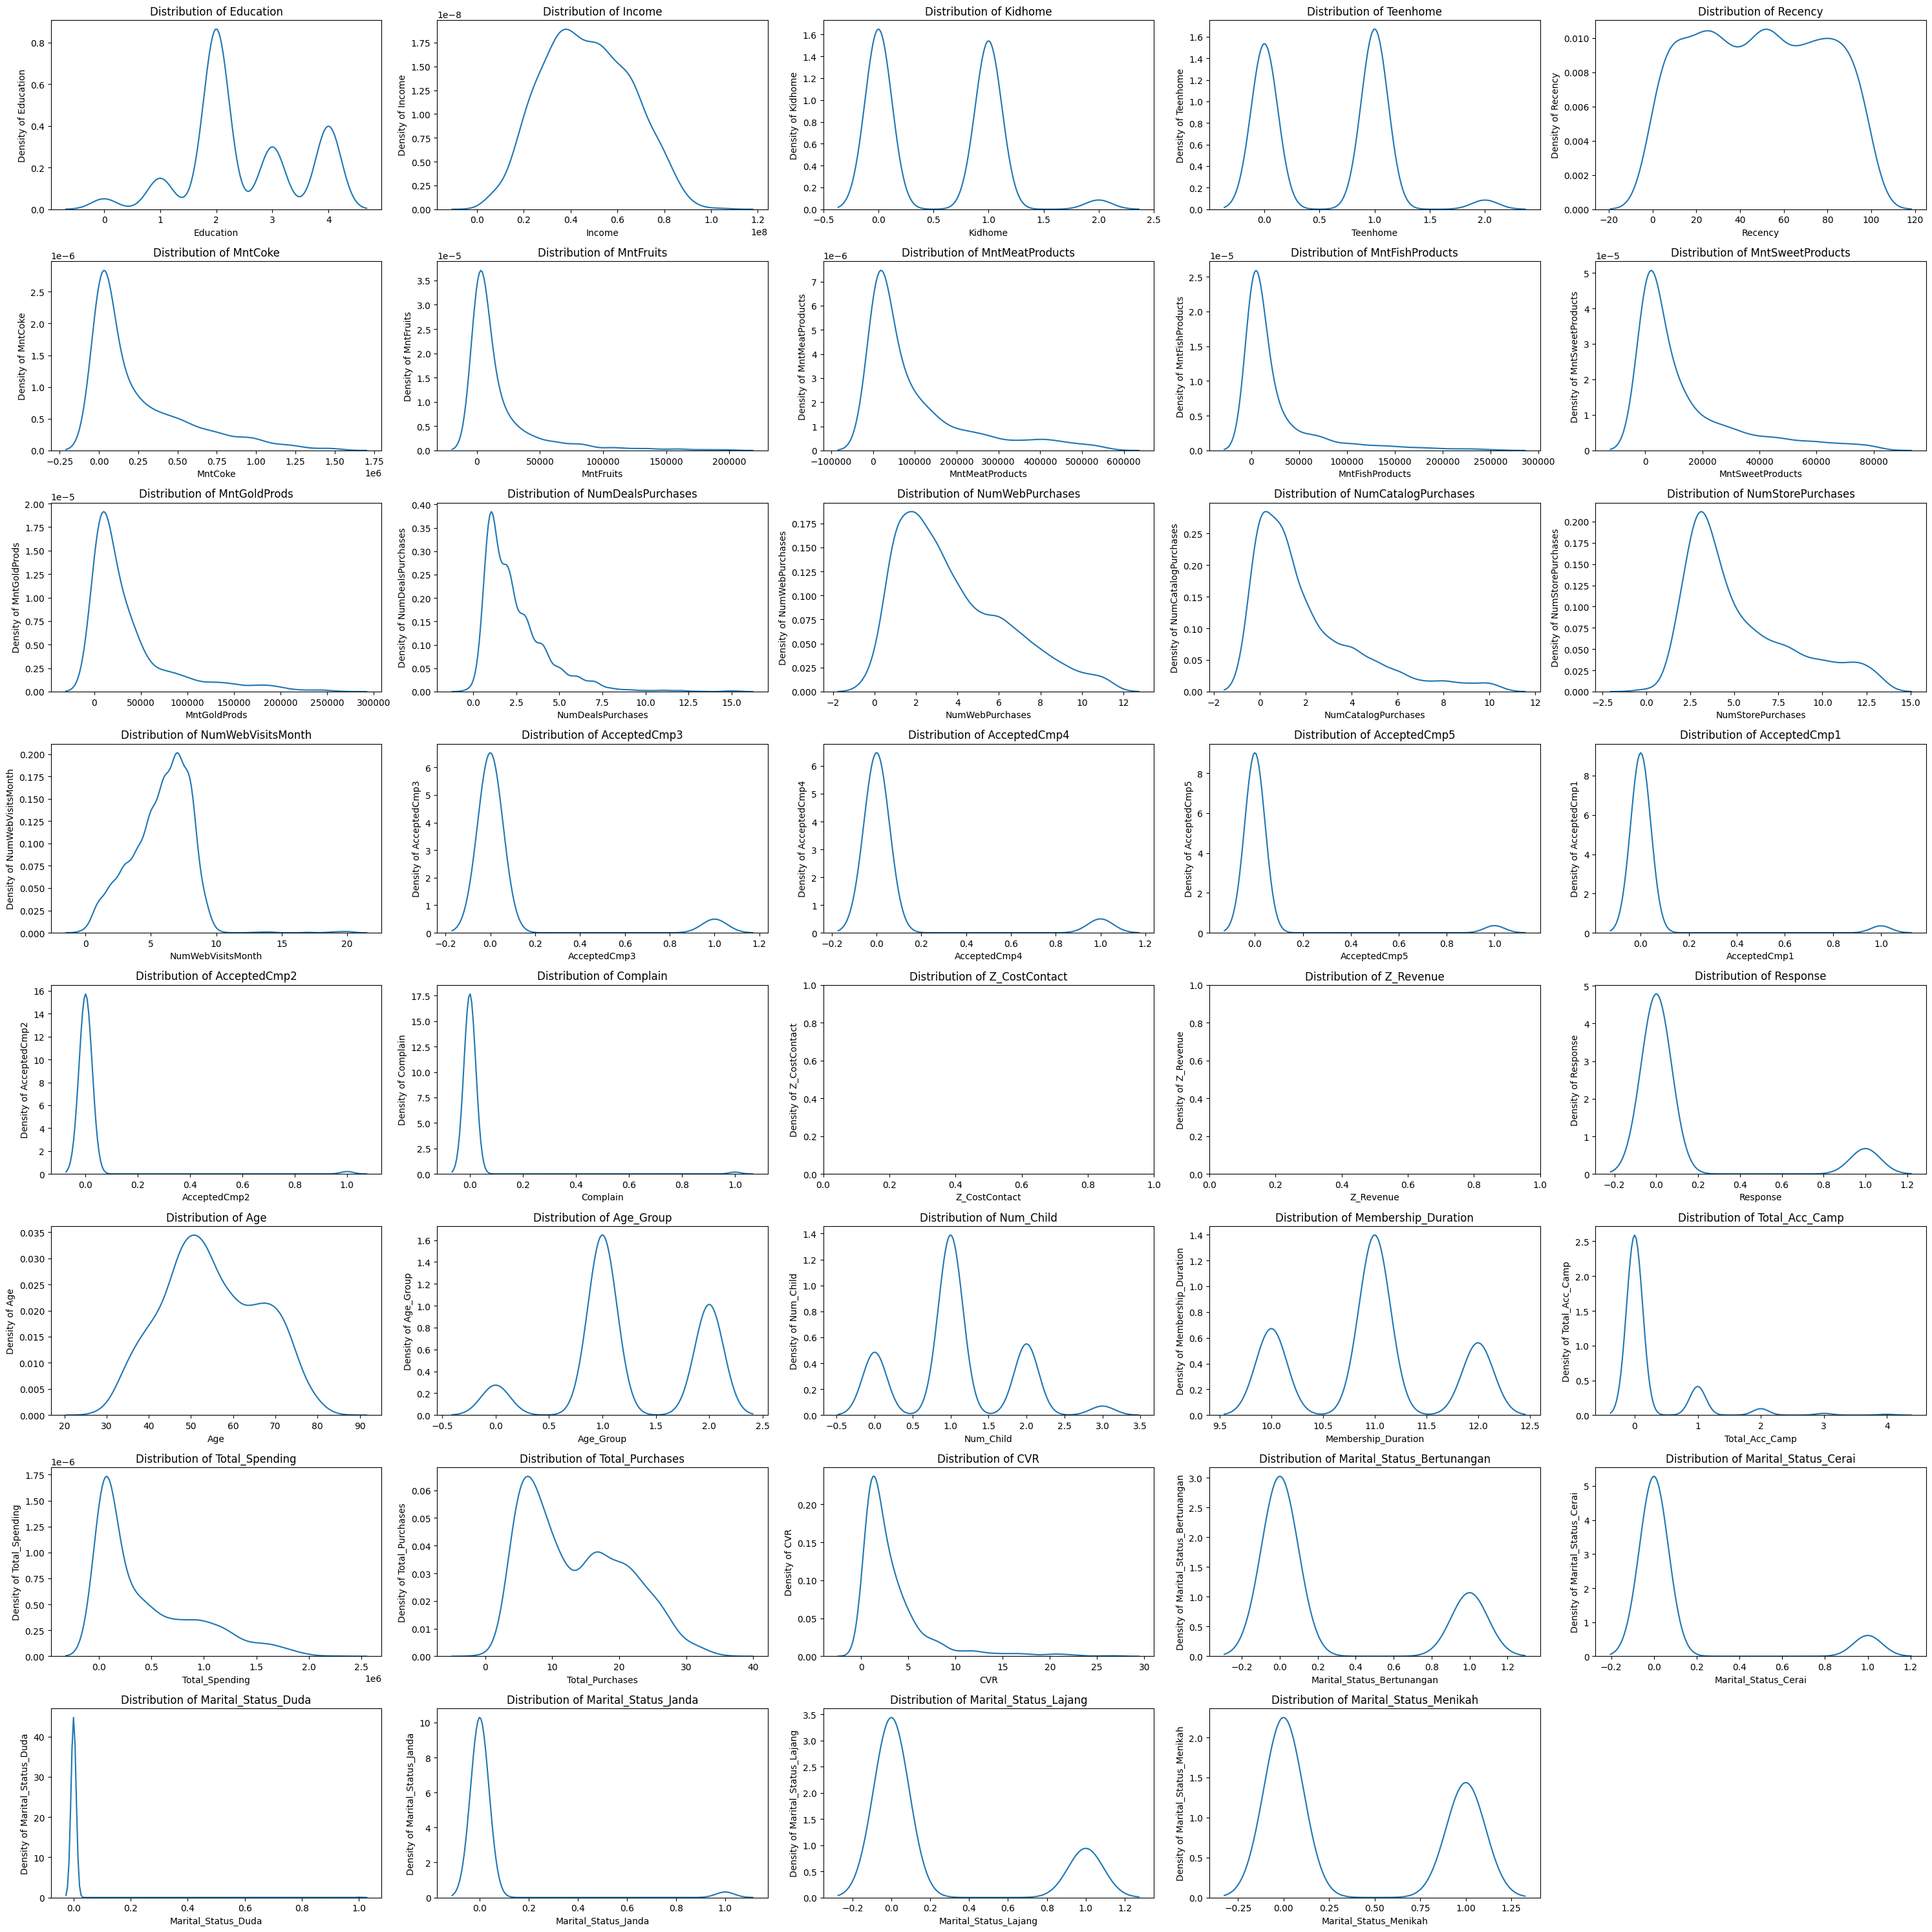

In [68]:
#Kdeplot before scaling
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(df_preprocessed.columns)) :
    sns.kdeplot(data = df_preprocessed, ax=axes[i], x=df_preprocessed.columns[i])
    axes[i].set_title(f'Distribution of {df_preprocessed.columns[i]}')
    axes[i].set_ylabel(f'Density of {df_preprocessed.columns[i]}')
    axes[i].set_xlabel(f'{df_preprocessed.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_preprocessed.columns) < len(axes):
    axes[len(df_preprocessed.columns)].remove()

plt.tight_layout()
plt.show()

In [69]:
# Standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_std_values = ss.fit_transform(df_preprocessed[df_preprocessed.columns])

In [70]:
df_preprocessed = pd.DataFrame(df_std_values, columns=df_preprocessed.columns)
df_preprocessed

Education    Income   Kidhome  Teenhome   Recency   MntCoke  MntFruits  \
0     -0.471204 -0.035126  0.870580  0.807079 -0.369001 -0.759893  -0.550662   
1     -0.471204  1.326298 -0.951860 -1.024596 -0.783785  0.554474   1.076730   
2     -0.471204 -1.096400  0.870580 -1.024596 -0.783785 -0.759893  -0.448950   
3      1.488372  0.608653  0.870580 -1.024596  1.566660 -0.246815   0.873306   
4      0.508584  0.836015 -0.951860  0.807079 -1.129439  0.852186   0.839402   
...         ...       ...       ...       ...       ...       ...        ...   
1856  -0.471204 -0.677505  0.870580 -1.024596  1.117311 -0.785230  -0.482854   
1857   1.488372  0.916885  2.693021  0.807079  0.253176  0.491131  -0.584566   
1858  -0.471204  0.537966 -0.951860 -1.024596  1.462964  2.081041   1.042826   
1859   0.508584  1.198717 -0.951860  0.807079 -1.405962  0.560809   0.432554   
1860   1.488372  0.316423  0.870580  0.807079 -0.299870 -0.528691  -0.482854   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0           -0.732965        -0.553375         -0.679520     -0.665694   
1            0.236809         2.024394          0.418402      0.121215   
2           -0.620759        -0.364181         -0.569728     -0.687552   
3            0.164677         0.487193          0.747779     -0.468967   
4            0.004384        -0.600673          1.571220     -0.490825   
...               ...              ...               ...           ...   
1856        -0.724950        -0.458778         -0.624624     -0.600118   
1857        -0.540613        -0.600673         -0.734416     -0.621977   
1858         0.958129         0.156103         -0.075663     -0.272240   
1859         0.934085         1.291267          0.912467      0.536527   
1860        -0.292158        -0.553375         -0.679520     -0.337815   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             -0.249837        -1.064359            -0.430726   
1             -0.786109         1.608748            -0.001154   
2             -0.249837        -0.682487            -0.860297   
3              1.358977         0.463131             0.428417   
4             -0.249837         0.845003             0.857989   
...                 ...              ...                  ...   
1856          -0.786109        -1.064359            -0.860297   
1857           2.431520         1.608748            -0.001154   
1858          -0.786109        -0.682487             0.428417   
1859          -0.249837         0.845003             1.287561   
1860           0.286434        -0.300614            -0.430726   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -1.079434          -0.355322     -0.275177     -0.277430   
1              1.529855          -0.803022     -0.275177     -0.277430   
2             -0.427111           0.092379     -0.275177     -0.277430   
3              0.225211          -0.355322     -0.275177     -0.277430   
4              1.529855           0.092379     -0.275177     -0.277430   
...                 ...                ...           ...           ...   
1856          -1.079434           0.540080     -0.275177     -0.277430   
1857          -0.100950           0.540080     -0.275177     -0.277430   
1858           2.508338           0.092379     -0.275177      3.604508   
1859           1.529855          -1.250723     -0.275177     -0.277430   
1860          -0.427111           0.540080     -0.275177     -0.277430   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
1         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
2         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
3         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
4         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
...            ...           ...    

In [71]:
# Re-check the mean and standard deviation after standardization
df_preprocessed.describe().transpose()[['mean', 'std']]

mean       std
Education                  -1.240873e-16  1.000269
Income                     -1.756312e-16  1.000269
Kidhome                     1.088150e-16  1.000269
Teenhome                    0.000000e+00  1.000269
Recency                     1.221782e-16  1.000269
MntCoke                    -4.199876e-17  1.000269
MntFruits                  -1.336324e-17  1.000269
MntMeatProducts            -3.818070e-18  1.000269
MntFishProducts            -7.636139e-18  1.000269
MntSweetProducts           -5.345297e-17  1.000269
MntGoldProds                4.199876e-17  1.000269
NumDealsPurchases          -1.450866e-16  1.000269
NumWebPurchases             1.336324e-17  1.000269
NumCatalogPurchases         7.636139e-17  1.000269
NumStorePurchases           1.909035e-18  1.000269
NumWebVisitsMonth           1.679951e-16  1.000269
AcceptedCmp3               -2.863552e-17  1.000269
AcceptedCmp4                8.781560e-17  1.000269
AcceptedCmp5               -3.054456e-17  1.000269
AcceptedCmp1                7.636139e-17  1.000269
AcceptedCmp2                9.545174e-18  1.000269
Complain                    4.056699e-17  1.000269
Z_CostContact               0.000000e+00  0.000000
Z_Revenue                   0.000000e+00  0.000000
Response                    3.054456e-17  1.000269
Age                        -1.622680e-16  1.000269
Age_Group                   0.000000e+00  1.000269
Num_Child                  -1.489047e-16  1.000269
Membership_Duration         7.788862e-16  1.000269
Total_Acc_Camp              7.492961e-17  1.000269
Total_Spending              3.818070e-18  1.000269
Total_Purchases             4.390780e-17  1.000269
CVR                        -8.017946e-17  1.000269
Marital_Status_Bertunangan  7.874768e-17  1.000269
Marital_Status_Cerai       -3.197633e-17  1.000269
Marital_Status_Duda         1.909035e-17  1.000269
Marital_Status_Janda       -4.486232e-17  1.000269
Marital_Status_Lajang       4.868039e-17  1.000269
Marital_Status_Menikah     -5.727104e-18  1.000269

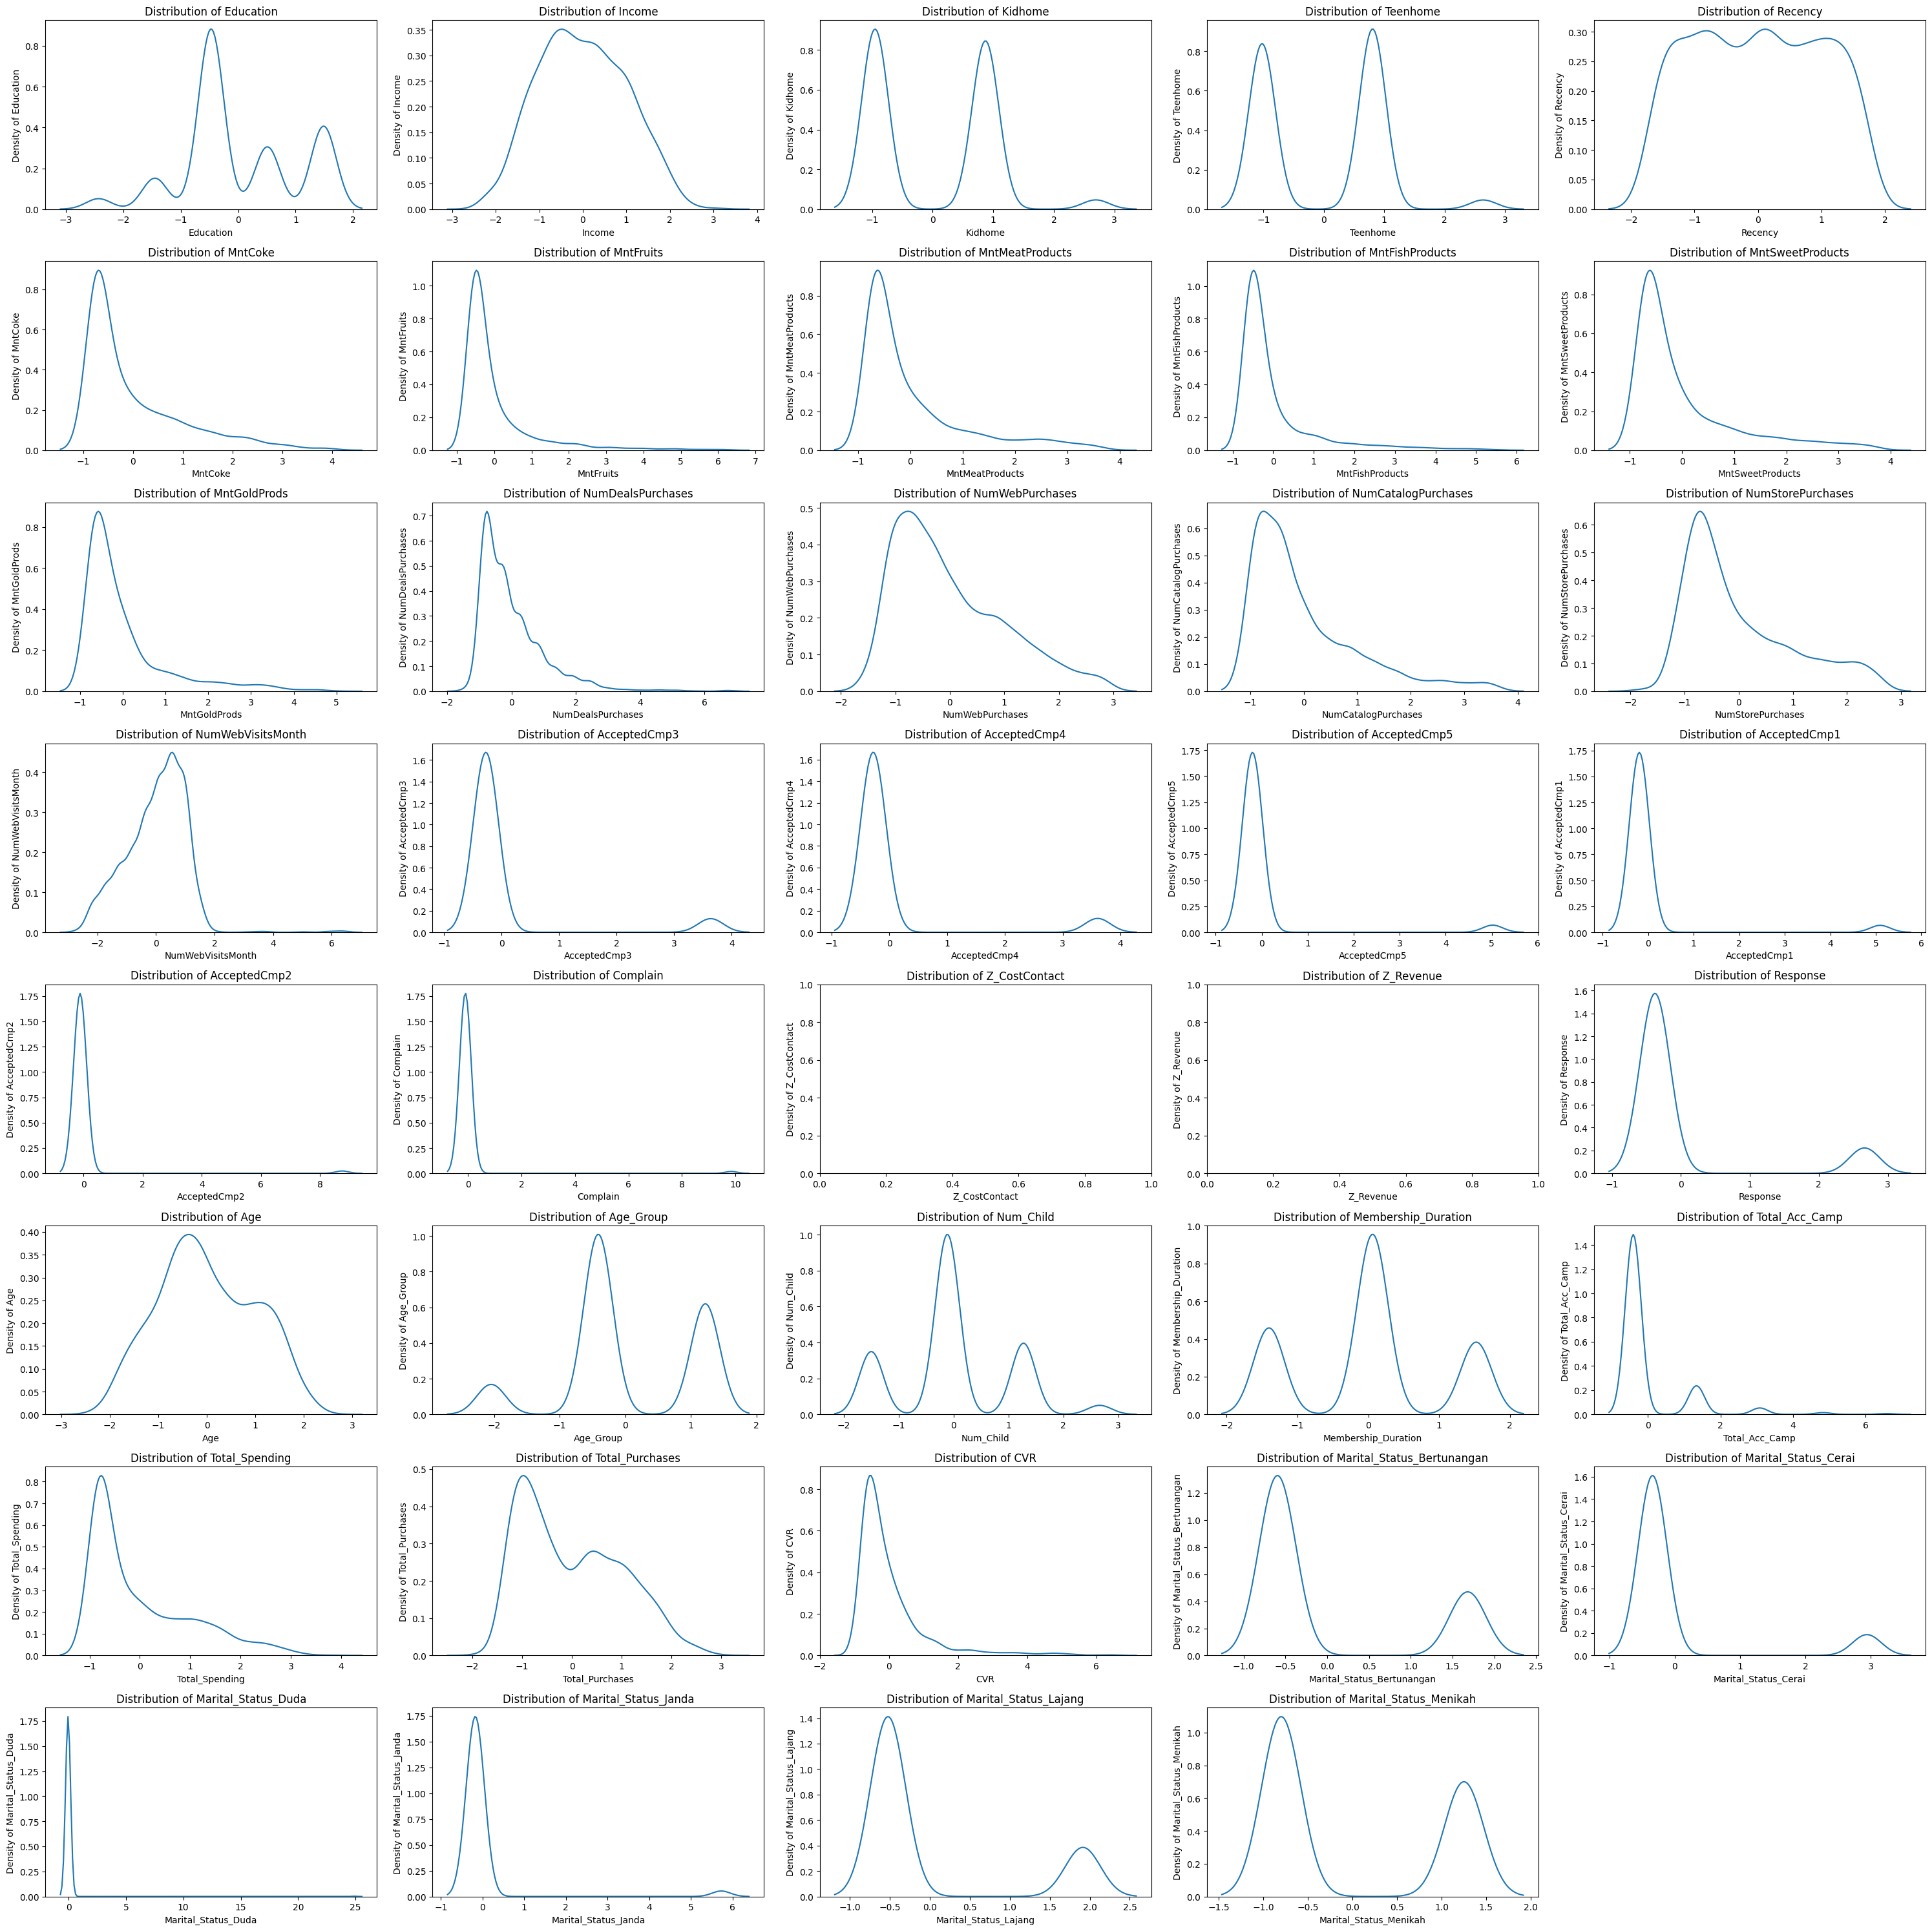

In [72]:
#Kdeplot after scaling
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(df_preprocessed.columns)) :
    sns.kdeplot(data = df_preprocessed, ax=axes[i], x=df_preprocessed.columns[i])
    axes[i].set_title(f'Distribution of {df_preprocessed.columns[i]}')
    axes[i].set_ylabel(f'Density of {df_preprocessed.columns[i]}')
    axes[i].set_xlabel(f'{df_preprocessed.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_preprocessed.columns) < len(axes):
    axes[len(df_preprocessed.columns)].remove()

plt.tight_layout()
plt.show()

# Clustering : K-means

In [128]:
# Make copy of dataframe
df_model = df_preprocessed.copy()

## PCA

Because we have so many features, we will need to reduce them without throwing information away using PCA.

In [129]:
from sklearn.decomposition import PCA 

# Fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# Transform data 
data_pca = pca.transform(df_model)
df_pca = pd.DataFrame(data_pca, columns = ['PC 1', 'PC 2'])

## Finding Optimal Cluster Using Elbow Method and Silhouette Score

<Axes: >

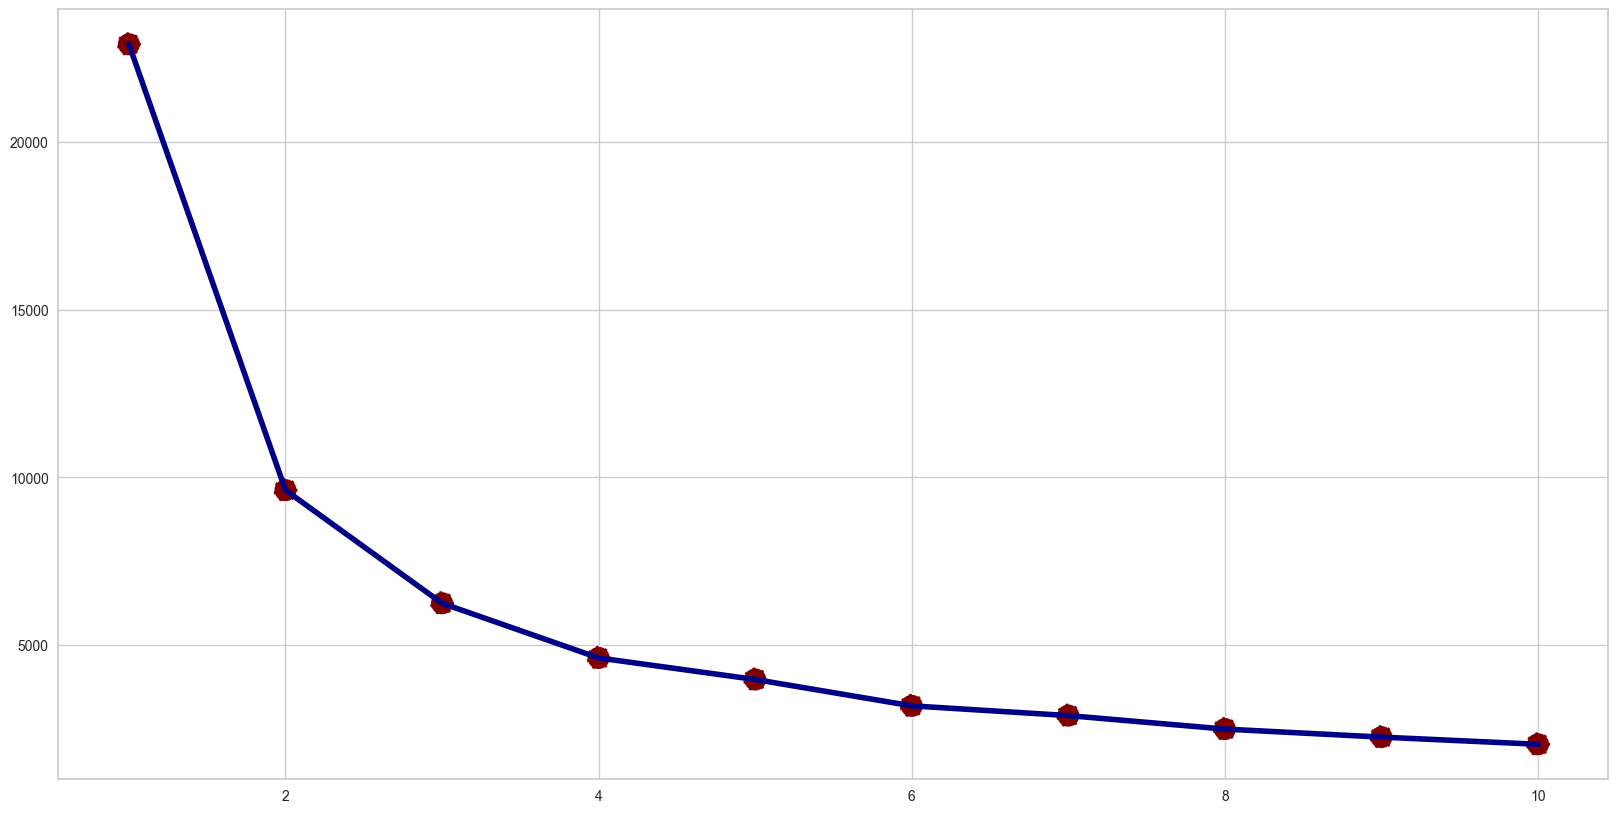

In [130]:
# Elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [131]:
#List of inertias
inertia

[22916.944579277766,
 9615.881326969129,
 6243.218135002606,
 4611.6858664475985,
 3968.9679023130443,
 3182.3377938057715,
 2892.0749991491134,
 2489.2434087866604,
 2250.167216523737,
 2036.1917923883957]

In [132]:
# Inertia reduction by cluster in percentage
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    58.040299
1    35.073885
2    26.132873
3    13.936725
4    19.819513
5     9.121055
6    13.928809
7     9.604372
8     9.509312
9          NaN
dtype: float64

In [133]:
?KElbowVisualizer

Init signature:
KElbowVisualizer(
    estimator,
    ax=None,
    k=10,
    metric='distortion',
    distance_metric='euclidean',
    timings=True,
    locate_elbow=True,
    **kwargs,
)
Docstring:     
The K-Elbow Visualizer implements the "elbow" method of selecting the
optimal number of clusters for K-means clustering. K-means is a simple
unsupervised machine learning algorithm that groups data into a specified
number (k) of clusters. Because the user must specify in advance what k to
choose, the algorithm is somewhat naive -- it assigns all members to k
clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of
values for k (say from 1-10) and then for each value of k computes an
average score for all clusters. By default, the ``distortion`` score is
computed, the sum of square distances from each point to its assigned
center. Other metrics can also be used such as the ``silhouette`` score,
the mean silhouette c

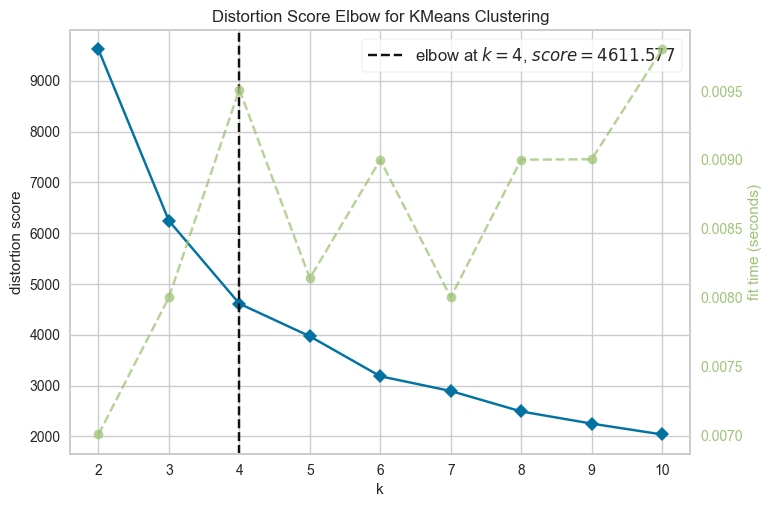

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
# Visualization with parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
model = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
kev = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)

# Fit the visualizer to the data
kev.fit(df_pca)

# Visualize the elbow plot
kev.show()

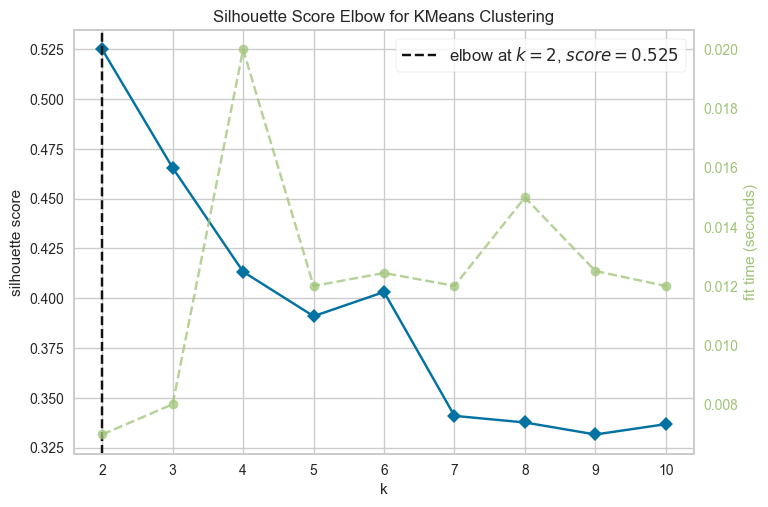

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [135]:
# Visualization with silhouette score
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
model = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
kev = KElbowVisualizer(model, metric='silhouette', distance_metric='euclidean', timings=True, locate_elbow=True)

# Fit the visualizer to the data
kev.fit(df_pca)

# Visualize the elbow plot
kev.show()

In [136]:
# Visualize silhouette score in heatmap
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

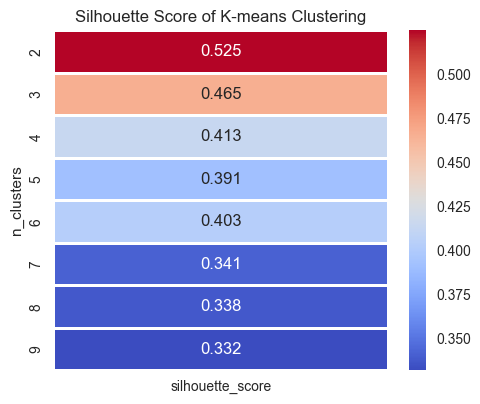

In [137]:
visualize_silhouette_layer(df_pca)

The distortion score told us that there should be 4 cluster while silhouette score told us that there should be only 2, we will see the comparison using silhouette plot of 2 and 4 cluster to see which one is more proper.

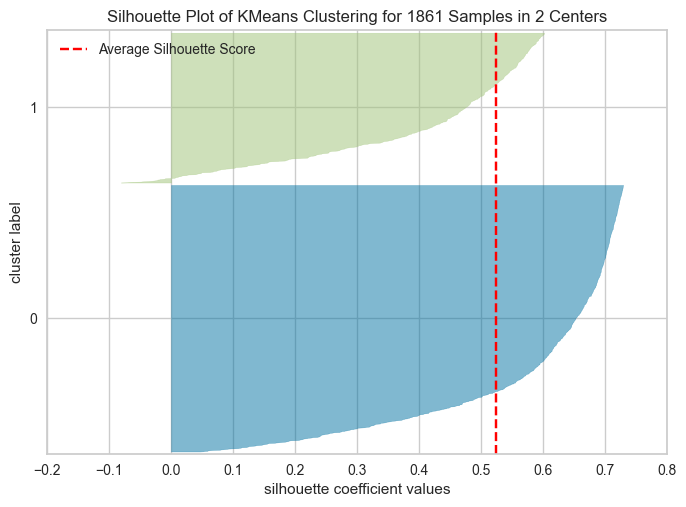

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1861 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [138]:
# Silhouette plot (2 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

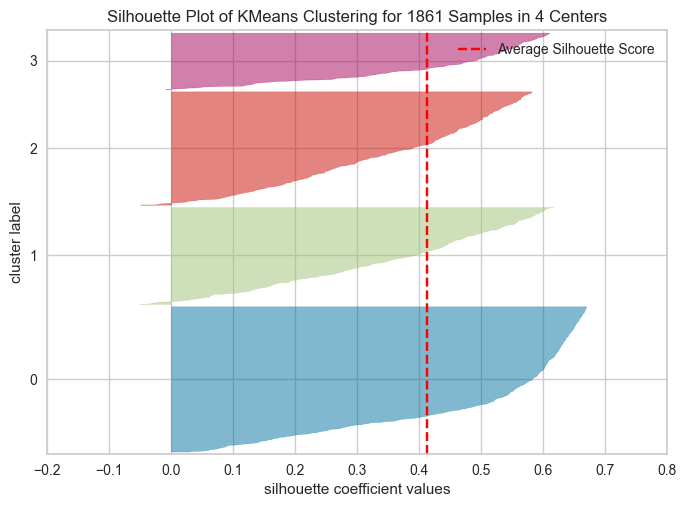

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1861 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [139]:
#Silhouetter plot (4 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

> From the plot above, we can see that the silhouette coefficient of 4 clusters may be lower, but they are more evenly distributed among the four clusters compared to 2 clusters. Therefore, in this case, we will choose 4 clusters.

## Clustering Process Using K-means

In [140]:
# Fit cluster into our scaled dataframe
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_pca.values)

KMeans(n_clusters=4, random_state=42)

In [141]:
# Assign the cluster to our original dataframe and scaled dataframe
df_pca['Clusters'] = kmeans.labels_
df_filtered_outliers['Clusters'] = kmeans.labels_

Text(0.5, 1.0, 'Cluster Segementation')

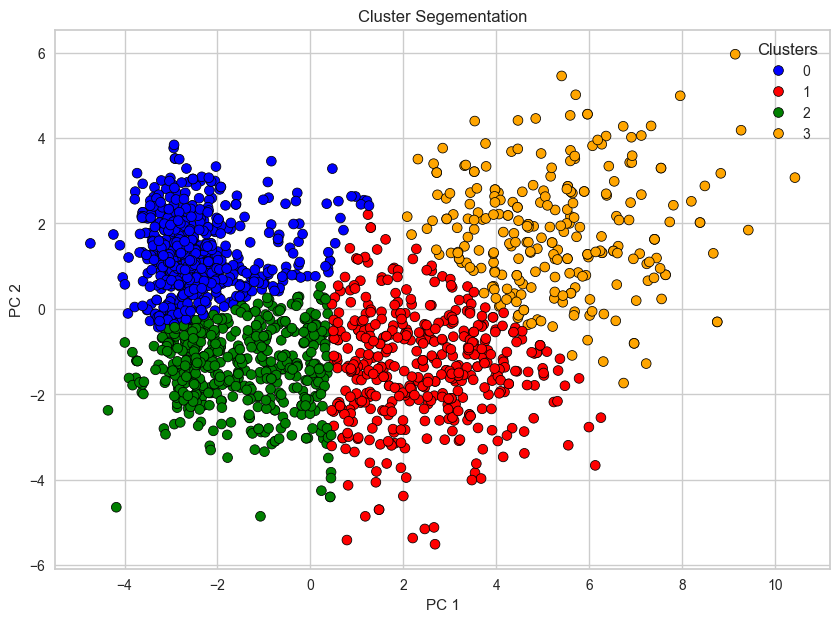

In [142]:
# Segmentation visualization
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data = df_pca, x='PC 1', y='PC 2', edgecolor='black', hue='Clusters', palette=['blue','red','green','orange'])
plt.title('Cluster Segementation')

# Cluster Interpretation and Business Recommendation

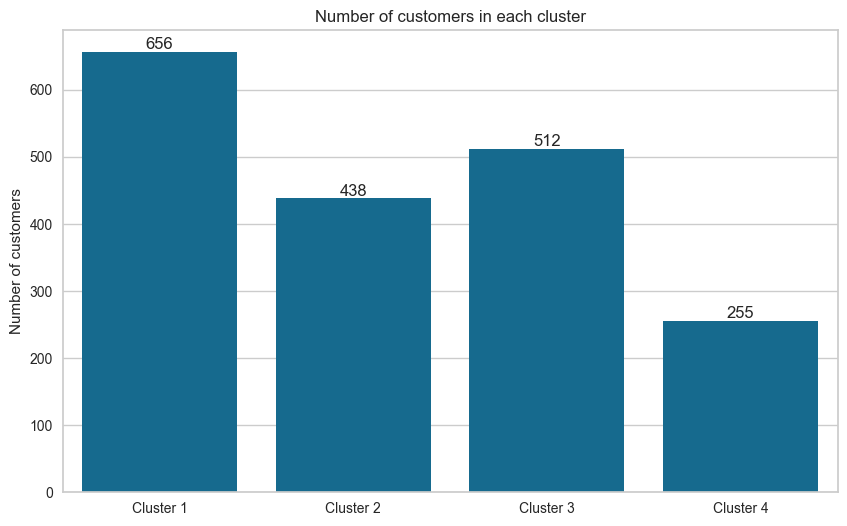

In [143]:
# Check count of each clusters

plt.figure(figsize=(10,6))
ax = sns.countplot(x = df_filtered_outliers['Clusters'])
ax.bar_label(ax.containers[0])  #to display count
plt.xticks([0, 1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()

In [171]:
# See original dataframe grouped with cluster aggregated by mean and median
summary_feature = ['Income', 'Age', 'Recency', 'Total_Spending', 'Total_Purchases', 'CVR', 'Clusters']
summary_feature_exc_cluster = ['Income', 'Age', 'Recency', 'Total_Spending', 'Total_Purchases', 'CVR']

result = round(df_filtered_outliers[summary_feature].groupby('Clusters').agg(['mean', 'median']), 2)

# Display the result
display(result)

Income                Age        Recency        Total_Spending  \
                 mean      median   mean median    mean median           mean   
Clusters                                                                        
0         30850664.63  30431500.0  47.04   47.0   49.12   48.0       88778.96   
1         60374070.78  60529000.0  60.44   61.0   48.57   49.0      816116.44   
2         43200811.52  44064500.0  60.79   61.0   48.64   49.5      182279.30   
3         73171756.86  73691000.0  54.56   54.0   47.78   49.0     1221211.76   

                    Total_Purchases          CVR         
             median            mean median  mean median  
Clusters                                                 
0           57000.0            7.27    7.0  1.24    1.0  
1          757500.0           21.73   22.0  4.52    4.0  
2          140000.0           11.17   10.0  1.88    1.8  
3         1180000.0           20.55   20.0  9.25    8.0

In [150]:
df_cluster_interpret = df_filtered_outliers[summary_feature]

In [151]:
df_cluster_interpret

Income  Age  Recency  Total_Spending  Total_Purchases   CVR  \
1     46344000.0   70       38           27000                6  1.20   
2     71613000.0   59       26          776000               21  5.25   
3     26646000.0   40       26           53000                8  1.33   
4     58293000.0   43       94          422000               19  3.80   
5     62513000.0   57       16          716000               22  3.67   
...          ...  ...      ...             ...              ...   ...   
2234  34421000.0   50       81           30000                4  0.57   
2236  64014000.0   78       56          444000               22  3.14   
2237  56981000.0   43       91         1241000               19  3.17   
2238  69245000.0   68        8          843000               23  7.67   
2239  52869000.0   70       40          172000               11  1.57   

      Clusters  
1            2  
2            3  
3            0  
4            1  
5            1  
...        ...  
2234         0  
2236         2  
2237         3  
2238         1  
2239         2  

[1861 rows x 7 columns]

In [169]:
?set

Init signature: set(self, /, *args, **kwargs)
Docstring:     
set() -> new empty set object
set(iterable) -> new set object

Build an unordered collection of unique elements.
Type:           type
Subclasses:     LazySet, LazySet, LazySet, _UniqueDirs

In [174]:
df_cluster_interpret

Income  Age  Recency  Total_Spending  Total_Purchases   CVR  \
1     46344000.0   70       38           27000                6  1.20   
2     71613000.0   59       26          776000               21  5.25   
3     26646000.0   40       26           53000                8  1.33   
4     58293000.0   43       94          422000               19  3.80   
5     62513000.0   57       16          716000               22  3.67   
...          ...  ...      ...             ...              ...   ...   
2234  34421000.0   50       81           30000                4  0.57   
2236  64014000.0   78       56          444000               22  3.14   
2237  56981000.0   43       91         1241000               19  3.17   
2238  69245000.0   68        8          843000               23  7.67   
2239  52869000.0   70       40          172000               11  1.57   

      Clusters  
1            2  
2            3  
3            0  
4            1  
5            1  
...        ...  
2234         0  
2236         2  
2237         3  
2238         1  
2239         2  

[1861 rows x 7 columns]

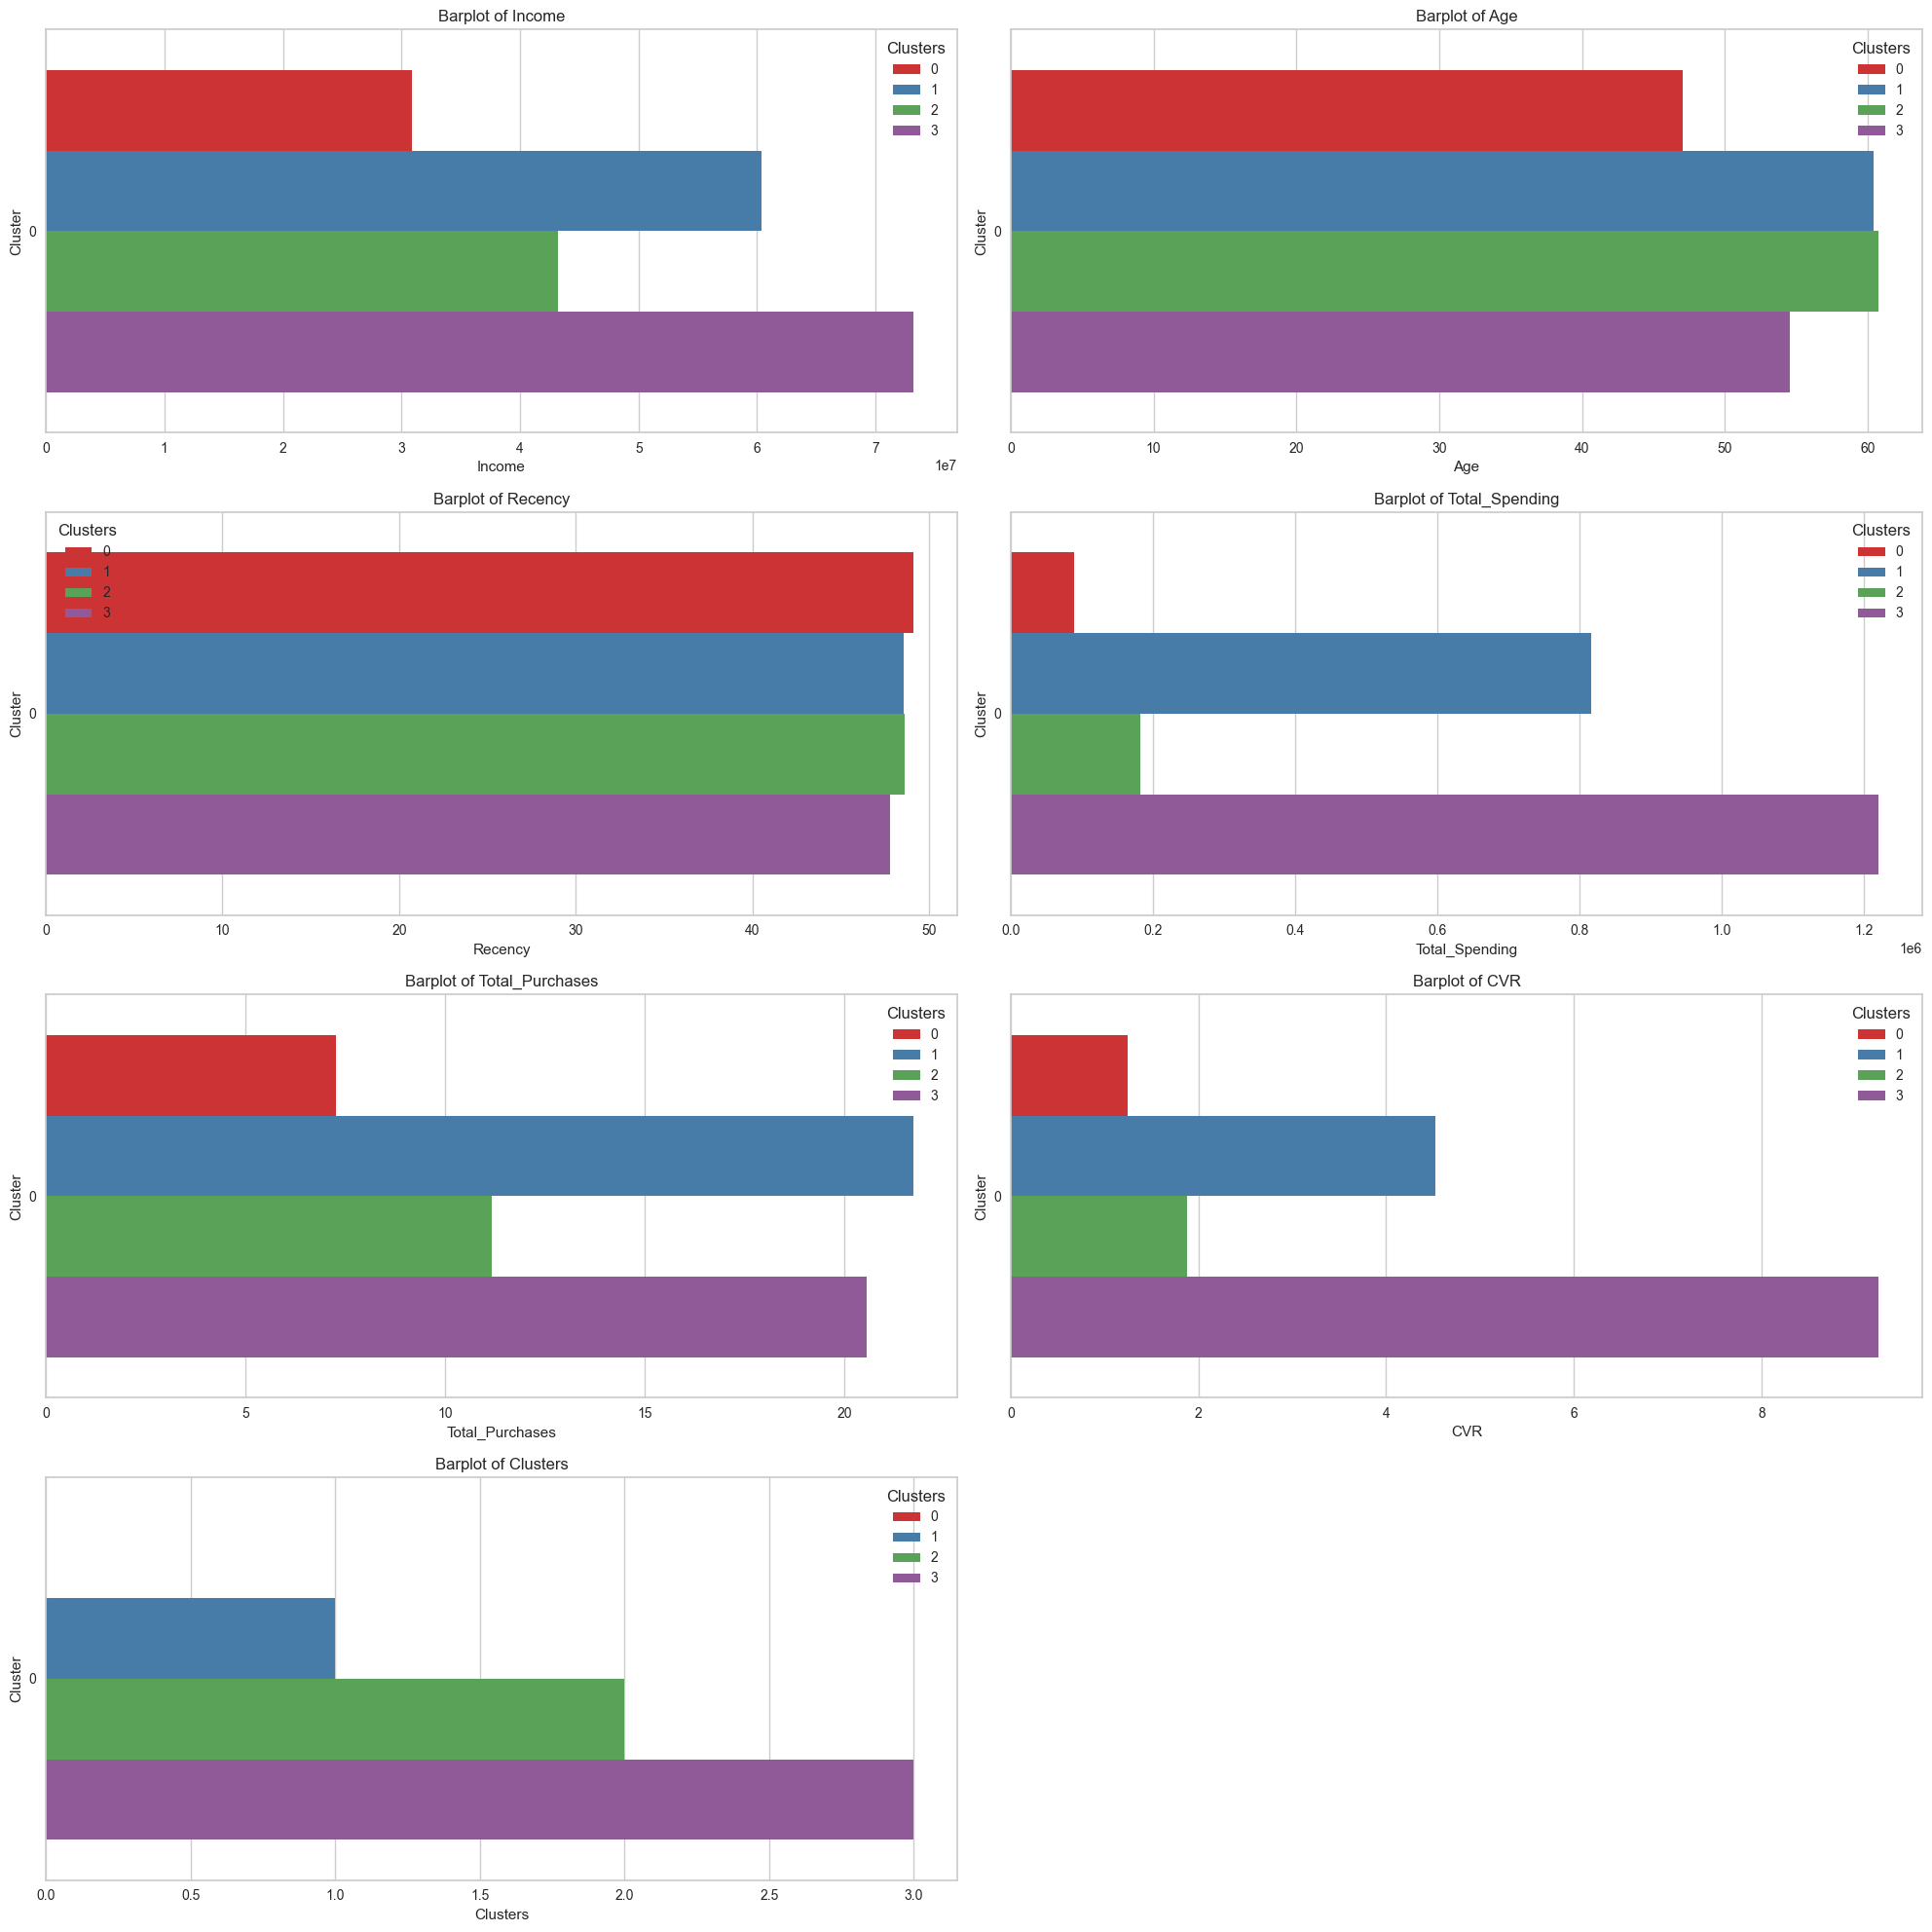

In [176]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
ax = ax.flatten()


for i in range(len(summary_feature)):
    sns.barplot(data=df_cluster_interpret, ax=ax[i], x=summary_feature[i], hue='Clusters', ci=False, palette='Set1')
    ax[i].set_title(f'Barplot of {summary_feature[i]}')
    ax[i].set_ylabel('Cluster')
    ax[i].set_yticklabels(['0', '1', '2', '3'])
    ax[i].set_xlabel(f'{summary_feature[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_cluster_interpret.columns) < len(ax):
    ax[len(df_cluster_interpret.columns)].remove()

plt.tight_layout()
plt.show()
